#**Design Credit Project**

###**Lata Sharma **

##Importing the Necessary Python Libraries and Components

In [ ]:
import pandas as pd
import requests 
from bs4 import BeautifulSoup
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
import collections
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer

#Social Media Apps

##Scrape Telegram Data

In [ ]:
def telegramData(main_url, num_of_sites):
    urls = []
    version_name = []
    version_date = []
    version_comments = []
    all_comments = []
    for i in range(1, num_of_sites+1):
        url = main_url + str(i) + '/'
        urls.append(url)
    for i in range(num_of_sites):
        response = requests.get(urls[i])
        print("Website:", i+1, "Response:", response)
        soup = BeautifulSoup(response.content, 'html.parser')
        version_data = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        data_lst = []
        for i in version_data:
            if(i.a != None):
                data_lst.append(i.a.text)
                version_name.append(i.a.text)
        a = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        a = np.array(a)
        z = [str(i) for i in a]
        dates = []
        for i in z:
            x = i[i.find('(')+1:i.find(')')]
            if(x[0] == 'U'):
                dates.append(x)
                version_date.append(x)
        LL = []
        com = soup.find_all('ul', attrs = {'class': 'changes'})
        for j in com:
            L = []
            text = list(j.descendants)
            for i in range(2, len(text), 3):
                L.append(text[i])
                all_comments.append(text[i])
            LL.append(L)
            version_comments.append(L)
        val = len(data_lst)-len(LL)
        for i in range(val):
            version_comments.append("-")
    print(len(version_name))
    print(len(version_date))
    print(len(version_comments))
    df = pd.DataFrame({'version_name': version_name, 'version_date': version_date, 'version_bugs_fixes': version_comments})
    return df, all_comments

In [ ]:
telegram_data, telegram_comments = telegramData("https://www.ipa4fun.com/history/15540/", 8)

Website: 1 Response: <Response [200]>
Website: 2 Response: <Response [200]>
Website: 3 Response: <Response [200]>
Website: 4 Response: <Response [200]>
Website: 5 Response: <Response [200]>
Website: 6 Response: <Response [200]>
Website: 7 Response: <Response [200]>
Website: 8 Response: <Response [200]>
151
151
151


In [ ]:
print("- Before removing the duplicates from df:",telegram_data.shape)

# Removing the list brackets from bug fixes statements.
telegram_data['version_bugs_fixes'] = telegram_data['version_bugs_fixes'].str[0]

# Removing the duplicates from the dataframe.
telegram_data = telegram_data.drop_duplicates()

# Updating the date format.
def updateDate(x):
	return x.replace("Updated: ","")
telegram_data['version_date'] = telegram_data['version_date'].apply(updateDate)

print("- After removing the duplicates from df:",telegram_data.shape)

# Blank Line
print("")
telegram_data

- Before removing the duplicates from df: (151, 3)
- After removing the duplicates from df: (144, 3)



,version_name,version_date,version_bugs_fixes
0,Telegram Messenger 8.7.1,"April 22, 2022",NOTIFICATION SOUNDS AND MUCH MORE
1,Telegram Messenger 8.7,"April 16, 2022",NOTIFICATION SOUNDS AND MUCH MORE
2,Telegram Messenger 8.6.1,"April 7, 2022","DOWNLOAD MANAGER, NEW ATTACHMENT MENU, AND MORE"
3,Telegram Messenger 8.6,"March 11, 2022","DOWNLOAD MANAGER, NEW ATTACHMENT MENU, AND MORE"
4,Telegram Messenger 8.5.1,"February 2, 2022","VIDEO STICKERS, BETTER REACTIONS AND MORE"
...,...,...,...
145,Telegram Messenger 2.9.3,"February 25, 2015",-
147,Telegram Messenger 2.9.2,"February 13, 2015",Secret chat voice messages fixed
148,Telegram Messenger 2.9.1,"February 12, 2015",Bug fixes
149,Telegram Messenger 2.9,"February 1, 2015",NEW: View and search all the documents shared ...


In [ ]:
telegram_comments = telegram_data['version_bugs_fixes'].tolist()
print("Before removing the '-' element from the list:",len(telegram_comments))

Before removing the '-' element from the list: 144


In [ ]:
# Removing the random words from the dataset/dataframe.
L = ['Apple', 'IOS', 'ios', 'apple', 'IOS', 'Iphone', 'iphone', '-']
for i in telegram_comments:
    if(any(email_service in i for email_service in L)):
        telegram_comments.remove(i)
print("After removing the '-' element from the list:",len(telegram_comments))

After removing the '-' element from the list: 29


In [ ]:
telegram_comments

['NOTIFICATION SOUNDS AND MUCH MORE',
 'NOTIFICATION SOUNDS AND MUCH MORE',
 'DOWNLOAD MANAGER, NEW ATTACHMENT MENU, AND MORE',
 'DOWNLOAD MANAGER, NEW ATTACHMENT MENU, AND MORE',
 'VIDEO STICKERS, BETTER REACTIONS AND MORE',
 'Password Recovery and Reminders',
 'GROUP VIDEO CALLS AND ANIMATED BACKGROUNDS',
 'GROUP VIDEO CALLS AND ANIMATED BACKGROUNDS',
 'Scheduled Voice Chats',
 'Yes, Video Calls (first version)',
 'PROFILE VIDEOS, IMPROVED PEOPLE NEARBY, 2 GB FILE SHARING, AND MORE',
 'PROFILE VIDEOS, IMPROVED PEOPLE NEARBY, 2 GB FILE SHARING, AND MORE',
 'NEW MEDIA EDITOR, BETTER GIFS, AND MORE',
 'SCHEDULED MESSAGES',
 'SILENT MESSAGES, GROUP ADMIN TITLES AND SLOW MODE',
 'INTRODUCING ANIMATED STICKERS',
 'INTRODUCING ANIMATED STICKERS',
 'Improved streaming support for audio and video files.',
 'Share your location with friends in real time with the new Live Locations.',
 "Groups with unread mentions and replies are now marked with an '@' badge in the chats list.",
 'Add emoji to 

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(telegram_comments)
vectorizer.get_feature_names_out()

array(['000', '100', '20x', 'accessible', 'active', 'add', 'admin',
       'animated', 'attachment', 'audio', 'autoplay', 'backgrounds',
       'badge', 'better', 'bug', 'calls', 'chat', 'chats', 'coming',
       'dedicated', 'documents', 'download', 'downloading', 'dozens',
       'editor', 'emoji', 'experimental', 'faster', 'favorite', 'file',
       'files', 'fixed', 'fixes', 'free', 'friends', 'gb', 'gif', 'gifs',
       'group', 'groups', 'improved', 'introducing', 'keyword', 'list',
       'live', 'location', 'locations', 'manager', 'marked', 'matching',
       'media', 'members', 'mentions', 'menu', 'message', 'messages',
       'million', 'mode', 'monthly', 'nearby', 'new', 'notification',
       'panel', 'password', 'people', 'pinned', 'posts', 'privacy',
       'profile', 'public', 'reached', 'reactions', 'real', 'recovery',
       'reminders', 'replies', 'revolution', 'save', 'scheduled',
       'search', 'secret', 'section', 'selection', 'send', 'sending',
       'share', '

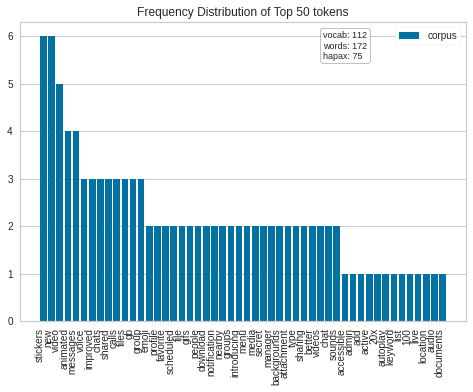

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(telegram_comments)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

In [ ]:
unique_telegram_comments = list(set(telegram_comments))
len(unique_telegram_comments)
for i in range(10):
    print(unique_telegram_comments[i])

Secret chat voice messages fixed
PROFILE VIDEOS, IMPROVED PEOPLE NEARBY, 2 GB FILE SHARING, AND MORE
Improved streaming support for audio and video files.
PUBLIC GROUPS, PINNED POSTS, 5,000 MEMBERS
Yes, Video Calls (first version)
Add emoji to a message by typing ‘:’ keyword.
Share your location with friends in real time with the new Live Locations.
SCHEDULED MESSAGES
DOWNLOAD MANAGER, NEW ATTACHMENT MENU, AND MORE
NEW: View and search all the documents shared in a chat new Shared Files section (accessible in Shared Media). You can now send files of any type up to 1,5 GB in size.


In [ ]:
# telegram_data.to_csv("telegram_data.csv")

##Scrape Twitter Data

In [ ]:
def twitterData(main_url, num_of_sites):
    urls = []
    version_name = []
    version_date = []
    version_comments = []
    all_comments = []
    for i in range(1, num_of_sites+1):
        url = main_url + str(i) + '/'
        urls.append(url)
    for i in range(num_of_sites):
        response = requests.get(urls[i])
        print("Website:", i+1, "Response:", response)
        soup = BeautifulSoup(response.content, 'html.parser')
        version_data = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        data_lst = []
        for i in version_data:
            if(i.a != None):
                data_lst.append(i.a.text)
                version_name.append(i.a.text)
        a = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        a = np.array(a)
        z = [str(i) for i in a]
        dates = []
        for i in z:
            x = i[i.find('(')+1:i.find(')')]
            if(x[0] == 'U'):
                dates.append(x)
                version_date.append(x)
        LL = []
        com = soup.find_all('ul', attrs = {'class': 'changes'})
        for j in com:
            L = []
            text = list(j.descendants)
            for i in range(2, len(text), 3):
                L.append(text[i])
                all_comments.append(text[i])
            LL.append(L)
            version_comments.append(L)
        val = len(data_lst)-len(LL)
        for i in range(val):
            version_comments.append("-")
    print(len(version_name))
    print(len(version_date))
    print(len(version_comments))
    df = pd.DataFrame({'version_name': version_name, 'version_date': version_date, 'version_bugs_fixes': version_comments})
    return df, all_comments

In [ ]:
twitter_data, twitter_comments = twitterData("https://www.ipa4fun.com/history/790/", 17)

Website: 1 Response: <Response [200]>
Website: 2 Response: <Response [200]>
Website: 3 Response: <Response [200]>
Website: 4 Response: <Response [200]>
Website: 5 Response: <Response [200]>
Website: 6 Response: <Response [200]>
Website: 7 Response: <Response [200]>
Website: 8 Response: <Response [200]>
Website: 9 Response: <Response [200]>
Website: 10 Response: <Response [200]>
Website: 11 Response: <Response [200]>
Website: 12 Response: <Response [200]>
Website: 13 Response: <Response [200]>
Website: 14 Response: <Response [200]>
Website: 15 Response: <Response [200]>
Website: 16 Response: <Response [200]>
Website: 17 Response: <Response [200]>
343
343
343


In [ ]:
twitter_data.shape

(343, 3)

In [ ]:
print("- Before removing the duplicates from df:", twitter_data.shape)

# Removing the list brackets from bug fixes statements.
twitter_data['version_bugs_fixes'] = twitter_data['version_bugs_fixes'].str[0]

# Removing the duplicates from the dataframe.
twitter_data = twitter_data.drop_duplicates()

# Updating the date format.
def updateDate(x):
	return x.replace("Updated: ","")
twitter_data['version_date'] = twitter_data['version_date'].apply(updateDate)

print("- After removing the duplicates from df:",twitter_data.shape)

# Blank Line
print("")
twitter_data

- Before removing the duplicates from df: (343, 3)
- After removing the duplicates from df: (327, 3)



,version_name,version_date,version_bugs_fixes
0,Twitter 9.7.2,"April 20, 2022",We made improvements and squashed bugs so Twit...
1,Twitter 9.7,"April 18, 2022",We made improvements and squashed bugs so Twit...
2,Twitter 9.6,"March 28, 2022",We made improvements and squashed bugs so Twit...
3,Twitter 9.5,"March 23, 2022",We made improvements and squashed bugs so Twit...
4,Twitter 9.4.1,"March 16, 2022",We made improvements and squashed bugs so Twit...
...,...,...,...
338,Twitter 6.13.4,"September 25, 2014",This update includes minor improvements.
339,Twitter 6.13.3,"September 18, 2014",This update includes new features to help you ...
340,Twitter 6.12.1,"September 4, 2014",-
341,Twitter 6.12,"September 2, 2014",-


In [ ]:
twitter_comments = twitter_data['version_bugs_fixes'].tolist()
print("Before removing the '-' element from the list:",len(twitter_comments))

Before removing the '-' element from the list: 327


In [ ]:
# Removing the random words from the dataset/dataframe.
L = ['Apple', 'IOS', 'ios', 'apple', 'IOS', 'Iphone', 'iphone', '-']
for i in twitter_comments:
    if(any(email_service in i for email_service in L)):
        twitter_comments.remove(i)
print("After removing the '-' element from the list:",len(twitter_comments))

After removing the '-' element from the list: 67


In [ ]:
twitter_comments

['We made improvements and squashed bugs so Twitter is even better for you.',
 'We made improvements and squashed bugs so Twitter is even better for you.',
 'We made improvements and squashed bugs so Twitter is even better for you.',
 'We made improvements and squashed bugs so Twitter is even better for you.',
 'We made improvements and squashed bugs so Twitter is even better for you.',
 'We made improvements and squashed bugs so Twitter is even better for you.',
 'We made improvements and squashed bugs so Twitter is even better for you.',
 'We made improvements and squashed bugs so Twitter is even better for you.',
 'We made improvements and squashed bugs so Twitter is even better for you.',
 'We made improvements and squashed bugs so Twitter is even better for you.',
 'We made improvements and squashed bugs so Twitter is even better for you.',
 'We made improvements and squashed bugs so Twitter is even better for you.',
 'We made improvements and squashed bugs so Twitter is even bett

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(twitter_comments)
vectorizer.get_feature_names_out()

array(['11', '12', 'access', 'accessible', 'accounts', 'activity', 'add',
       'ads', 'allows', 'answered', 'app', 'audio', 'bad', 'benefit',
       'best', 'better', 'big', 'bolt', 'browse', 'bug', 'bugs', 'button',
       'capture', 'catch', 'celebrate', 'certain', 'changed', 'changes',
       'cleaned', 'clips', 'comments', 'content', 'continue',
       'conversations', 'crashed', 'crazy', 'curtain', 'data',
       'descriptions', 'destination', 'details', 'devices', 'did', 'didn',
       'discover', 'discussed', 'easier', 'easily', 'exciting',
       'experience', 'explore', 'express', 'faster', 'favor', 'feature',
       'features', 'fixed', 'fixes', 'fixing', 'focused', 'follow',
       'good', 'group', 'happen', 'happy', 'help', 'helps', 'home',
       'imagine', 'immersive', 'improve', 'improvements', 'improving',
       'includes', 'including', 'insights', 'instant', 'interact',
       'introducing', 'ios', 'ipad', 'just', 'know', 'labels', 'language',
       'latest', 'laun

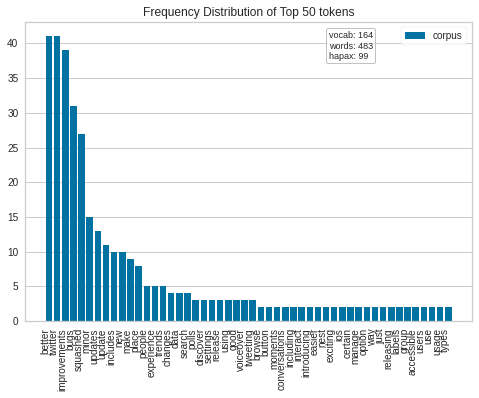

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(twitter_comments)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

In [ ]:
unique_twitter_comments = list(set(twitter_comments))
len(unique_twitter_comments)
for i in range(16,20):
    print(unique_twitter_comments[i])

Not all changes are visible, but we can still celebrate them.
Not too much has changed. But enough to warrant an update. Happy Tweeting!
Introducing the "Explore" tab a single destination to discover content. Outside of your timeline, trends show you what topics are being discussed right now, Moments capture the most popular stories so you can catch up, and search helps you find anything and everything.
A few minor updates to make Twitter an even better place.


In [ ]:
# twitter_data.to_csv("twitter_data.csv")

##Scrape Facebook Data

In [ ]:
def facebookData(main_url, num_of_sites):
    urls = []
    version_name = []
    version_date = []
    version_comments = []
    all_comments = []
    for i in range(1, num_of_sites+1):
        url = main_url + str(i) + '/'
        urls.append(url)
    for i in range(num_of_sites):
        response = requests.get(urls[i])
        print("Website:", i+1, "Response:", response)
        soup = BeautifulSoup(response.content, 'html.parser')
        version_data = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        data_lst = []
        for i in version_data:
            if(i.a != None):
                data_lst.append(i.a.text)
                version_name.append(i.a.text)
        a = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        a = np.array(a)
        z = [str(i) for i in a]
        dates = []
        for i in z:
            x = i[i.find('(')+1:i.find(')')]
            if(x[0] == 'U'):
                dates.append(x)
                version_date.append(x)
        LL = []
        com = soup.find_all('ul', attrs = {'class': 'changes'})
        for j in com:
            L = []
            text = list(j.descendants)
            for i in range(2, len(text), 3):
                L.append(text[i])
                all_comments.append(text[i])
            LL.append(L)
            version_comments.append(L)
        val = len(data_lst)-len(LL)
        for i in range(val):
            version_comments.append("-")
    print(len(version_name))
    print(len(version_date))
    print(len(version_comments))
    df = pd.DataFrame({'version_name': version_name, 'version_date': version_date, 'version_bugs_fixes': version_comments})
    return df, all_comments

In [ ]:
facebook_data, facebook_comments = facebookData("https://www.ipa4fun.com/history/704/", 17)

Website: 1 Response: <Response [200]>
Website: 2 Response: <Response [200]>
Website: 3 Response: <Response [200]>
Website: 4 Response: <Response [200]>
Website: 5 Response: <Response [200]>
Website: 6 Response: <Response [200]>
Website: 7 Response: <Response [200]>
Website: 8 Response: <Response [200]>
Website: 9 Response: <Response [200]>
Website: 10 Response: <Response [200]>
Website: 11 Response: <Response [200]>
Website: 12 Response: <Response [200]>
Website: 13 Response: <Response [200]>
Website: 14 Response: <Response [200]>
Website: 15 Response: <Response [200]>
Website: 16 Response: <Response [200]>
Website: 17 Response: <Response [200]>
341
341
341


In [ ]:
facebook_data.shape

(341, 3)

In [ ]:
print("-> Before removing the duplicates from df:",facebook_data.shape)

# Removing the list brackets from bug fixes statements.
facebook_data['version_bugs_fixes'] = facebook_data['version_bugs_fixes'].str[0]

# Removing the duplicates from the dataframe.
facebook_data = facebook_data.drop_duplicates()

# Updating the date format.
def updateDate(x):
	return x.replace("Updated: ","")
facebook_data['version_date'] = facebook_data['version_date'].apply(updateDate)

print("-> After removing the duplicates from df:",facebook_data.shape)

# Blank Line
print("")
facebook_data

-> Before removing the duplicates from df: (341, 3)
-> After removing the duplicates from df: (325, 3)



,version_name,version_date,version_bugs_fixes
0,Facebook 364.0,"April 27, 2022",We’ve updated the app to fix some crashes and ...
1,Facebook 363.0,"April 20, 2022",We’ve updated the app to fix some crashes and ...
2,Facebook 362.0,"April 12, 2022",We’ve updated the app to fix some crashes and ...
3,Facebook 361.0,"April 6, 2022",We’ve updated the app to fix some crashes and ...
4,Facebook 360.0,"March 31, 2022",We’ve updated the app to fix some crashes and ...
...,...,...,...
336,Facebook 15.0,"September 29, 2014",Thanks for using Facebook! To make our app bet...
337,Facebook 14.9,"September 17, 2014",Thanks for using Facebook! To make our app bet...
338,Facebook 14.1,"September 10, 2014",Thanks for using Facebook! To make our app bet...
339,Facebook 14.0,"August 28, 2014",Thanks for using Facebook! To make our app bet...


In [ ]:
facebook_comments = facebook_data['version_bugs_fixes'].tolist()
print("Before removing the '-' element from the list:",len(facebook_comments))

Before removing the '-' element from the list: 325


In [ ]:
# Removing the random words from the dataset/dataframe.
L = ['Apple', 'IOS', 'ios', 'apple', 'IOS', 'Iphone', 'iphone', '-', 'itunes', 'ios7']
for i in facebook_comments:
    if(any(email_service in i for email_service in L)):
        facebook_comments.remove(i)
print("After removing the '-' element from the list:",len(facebook_comments))

After removing the '-' element from the list: 69


In [ ]:
facebook_comments

['We’ve updated the app to fix some crashes and make features load faster.',
 'We’ve updated the app to fix some crashes and make features load faster.',
 'We’ve updated the app to fix some crashes and make features load faster.',
 'We’ve updated the app to fix some crashes and make features load faster.',
 'We’ve updated the app to fix some crashes and make features load faster.',
 'We’ve updated the app to fix some crashes and make features load faster.',
 'We’ve updated the app to fix some crashes and make features load faster.',
 'We’ve updated the app to fix some crashes and make features load faster.',
 'We’ve updated the app to fix some crashes and make features load faster.',
 'We’ve updated the app to fix some crashes and make features load faster.',
 'We’ve updated the app to fix some crashes and make features load faster.',
 'We’ve updated the app to fix some crashes and make features load faster.',
 'We’ve updated the app to fix some crashes and make features load faster.',

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(facebook_comments)
vectorizer.get_feature_names_out()

array(['app', 'automatic', 'automatically', 'available', 'better',
       'bring', 'bug', 'checking', 'crashes', 'downloads', 'facebook',
       'faster', 'features', 'fix', 'fixes', 'going', 'improvements',
       'includes', 'ios7', 'itunes', 'latest', 'load', 'make',
       'performance', 'regularly', 'settings', 'store', 'thanks',
       'turning', 'update', 'updated', 'updates', 'using', 've',
       'version', 'weeks'], dtype=object)

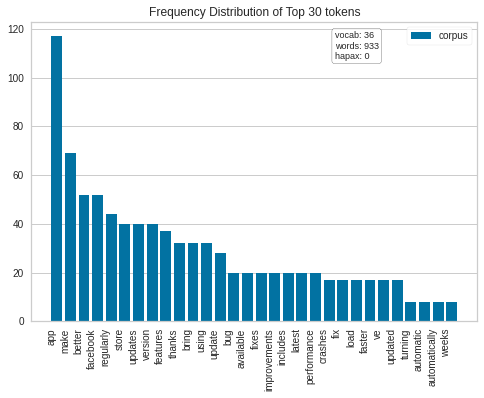

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(facebook_comments)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', n=30)
visualizer.fit(docs)
visualizer.show()

In [ ]:
unique_facebook_comments = list(set(facebook_comments))
print(unique_facebook_comments[2])
print(unique_facebook_comments[3])

Thanks for using Facebook! To make our app better for you, we bring updates to the App Store regularly.
We update the app regularly so we can make it better for you. Get the latest version for all of the available Facebook features. This version includes several bug fixes and performance improvements.


In [ ]:
# facebook_data.to_csv("facebook_data.csv")

##Scrape Instagram Data

In [ ]:
def instagramData(main_url, num_of_sites):
    urls = []
    version_name = []
    version_date = []
    version_comments = []
    all_comments = []
    for i in range(1, num_of_sites+1):
        url = main_url + str(i) + '/'
        urls.append(url)
    for i in range(num_of_sites):
        response = requests.get(urls[i])
        print("Website:", i+1, "Response:", response)
        soup = BeautifulSoup(response.content, 'html.parser')
        version_data = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        data_lst = []
        for i in version_data:
            if(i.a != None):
                data_lst.append(i.a.text)
                version_name.append(i.a.text)
        a = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        a = np.array(a)
        z = [str(i) for i in a]
        dates = []
        for i in z:
            x = i[i.find('(')+1:i.find(')')]
            if(x[0] == 'U'):
                dates.append(x)
                version_date.append(x)
        LL = []
        com = soup.find_all('ul', attrs = {'class': 'changes'})
        for j in com:
            L = []
            text = list(j.descendants)
            for i in range(2, len(text), 3):
                L.append(text[i])
                all_comments.append(text[i])
            LL.append(L)
            version_comments.append(L)
        val = len(data_lst)-len(LL)
        for i in range(val):
            version_comments.append("-")
    print(len(version_name))
    print(len(version_date))
    print(len(version_comments))
    df = pd.DataFrame({'version_name': version_name, 'version_date': version_date, 'version_bugs_fixes': version_comments})
    return df, all_comments

In [ ]:
instagram_data, instagram_comments = instagramData("https://www.ipa4fun.com/history/871/", 18)

Website: 1 Response: <Response [200]>
Website: 2 Response: <Response [200]>
Website: 3 Response: <Response [200]>
Website: 4 Response: <Response [200]>
Website: 5 Response: <Response [200]>
Website: 6 Response: <Response [200]>
Website: 7 Response: <Response [200]>
Website: 8 Response: <Response [200]>
Website: 9 Response: <Response [200]>
Website: 10 Response: <Response [200]>
Website: 11 Response: <Response [200]>
Website: 12 Response: <Response [200]>
Website: 13 Response: <Response [200]>
Website: 14 Response: <Response [200]>
Website: 15 Response: <Response [200]>
Website: 16 Response: <Response [200]>
Website: 17 Response: <Response [200]>
Website: 18 Response: <Response [200]>
371
371
371


In [ ]:
instagram_data.shape

(371, 3)

In [ ]:
print("- Before removing the duplicates from df:",instagram_data.shape)

# Removing the list brackets from bug fixes statements.
instagram_data['version_bugs_fixes'] = instagram_data['version_bugs_fixes'].str[0]

# Removing the duplicates from the dataframe.
instagram_data = instagram_data.drop_duplicates()

# Updating the date format.
def updateDate(x):
	return x.replace("Updated: ","")
instagram_data['version_date'] = instagram_data['version_date'].apply(updateDate)

print("- After removing the duplicates from df:",instagram_data.shape)

# Blank Line
print("")
instagram_data

- Before removing the duplicates from df: (371, 3)
- After removing the duplicates from df: (354, 3)



,version_name,version_date,version_bugs_fixes
0,Instagram 232.0,"April 25, 2022",The latest version contains bug fixes and perf...
1,Instagram 230.0,"April 14, 2022",The latest version contains bug fixes and perf...
2,Instagram 229.0,"April 12, 2022",The latest version contains bug fixes and perf...
3,Instagram 228.0,"March 28, 2022",The latest version contains bug fixes and perf...
4,Instagram 227.0,"March 21, 2022",The latest version contains bug fixes and perf...
...,...,...,...
366,Instagram 6.1.1,"September 19, 2014",-
367,Instagram 6.1.0,"September 17, 2014",-
368,Instagram 6.0.9,"September 8, 2014",-
369,Instagram 6.0.8,"August 25, 2014",-


In [ ]:
instagram_comments = instagram_data['version_bugs_fixes'].tolist()
print("Before removing the '-' element from the list:",len(instagram_comments))

Before removing the '-' element from the list: 354


In [ ]:
# Removing the random words from the dataset/dataframe.
L = ['Apple', 'IOS', 'ios', 'apple', 'IOS', 'Iphone', 'iphone', '-']
for i in instagram_comments:
    if(any(email_service in i for email_service in L)):
        instagram_comments.remove(i)
print("After removing the '-' element from the list:",len(instagram_comments))

After removing the '-' element from the list: 73


In [ ]:
instagram_comments

['The latest version contains bug fixes and performance improvements.',
 'The latest version contains bug fixes and performance improvements.',
 'The latest version contains bug fixes and performance improvements.',
 'The latest version contains bug fixes and performance improvements.',
 'The latest version contains bug fixes and performance improvements.',
 'The latest version contains bug fixes and performance improvements.',
 'The latest version contains bug fixes and performance improvements.',
 'The latest version contains bug fixes and performance improvements.',
 'Bug fixes and performance improvements.',
 'The latest version contains bug fixes and performance improvements.',
 'The latest version contains bug fixes and performance improvements.',
 'The latest version contains bug fixes and performance improvements.',
 'The latest version contains bug fixes and performance improvements.',
 'The latest version contains bug fixes and performance improvements.',
 'The latest version

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(instagram_comments)
vectorizer.get_feature_names_out()

array(['ability', 'added', 'automatically', 'away', 'bookmark', 'bug',
       'bullying', 'camera', 'catching', 'comments', 'commitment',
       'community', 'contains', 'conversations', 'crash', 'day', 'direct',
       'discover', 'doing', 'easy', 'editing', 'entertaining', 'express',
       'face', 'feed', 'filters', 'fixed', 'fixes', 'follow', 'friend',
       'friends', 'fun', 'gifs', 'giving', 'guidelines', 'hang', 'harass',
       'hashtags', 'homework', 'icon', 'improvement', 'improvements',
       'inclusive', 'instagram', 'intended', 'introducing', 'juno',
       'just', 'keeping', 'lark', 'later', 'latest', 'layout', 'like',
       'live', 'll', 'nametags', 'new', 'ongoing', 'open', 'ordinary',
       'people', 'performance', 'photo', 'photos', 'place', 'platform',
       'playful', 'post', 'posts', 'private', 'profile', 'prohibited',
       'revisit', 'reyes', 'right', 'save', 'saved', 'selfie', 'simply',
       'start', 'step', 'supportive', 'tab', 'tap', 'turn', 'underneat

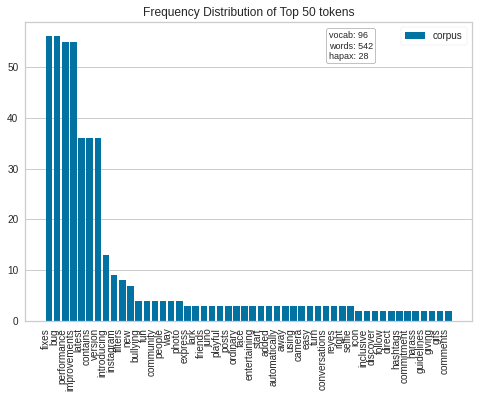

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(instagram_comments)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

In [ ]:
unique_instagram_comments = list(set(instagram_comments))
len(unique_instagram_comments)
for i in range(10):
    print(unique_instagram_comments[i])

Introducing nametags
Bug fixes and performance improvements
Bug fixes and performance improvement
Now you can save posts you'd like to revisit later. You'll see a new bookmark icon underneath posts in your feed. Simply tap the icon to save a post to a new, private tab on your profile. You can see all the posts you've saved from your profile and they're only visible to you.
Introducing face filters in the camera, an easy way to turn an ordinary selfie into something fun and entertaining. Express yourself and have playful conversations with friends.
The latest version contains bug fixes and performance improvements.
Introducing GIFs in Instagram Direct
Instagram now filters out bullying comments intended to harass or upset people in our community. Our Community Guidelines have always prohibited bullying on our platform, and this is the next step in our ongoing commitment to keeping Instagram an inclusive, supportive place for all voices.
Introducing a fun way to go live with a friend. No

In [ ]:
# instagram_data.to_csv("instagram_data.csv")

##Scrape WhatsApp Messenger Data

In [ ]:
def whatsappData(main_url, num_of_sites):
    urls = []
    version_name = []
    version_date = []
    version_comments = []
    all_comments = []
    for i in range(1, num_of_sites+1):
        url = main_url + str(i) + '/'
        urls.append(url)
    for i in range(num_of_sites):
        response = requests.get(urls[i])
        print("Website:", i+1, "Response:", response)
        soup = BeautifulSoup(response.content, 'html.parser')
        version_data = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        data_lst = []
        for i in version_data:
            if(i.a != None):
                data_lst.append(i.a.text)
                version_name.append(i.a.text)
        a = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        a = np.array(a)
        z = [str(i) for i in a]
        dates = []
        for i in z:
            x = i[i.find('(')+1:i.find(')')]
            if(x[0] == 'U'):
                dates.append(x)
                version_date.append(x)
        LL = []
        com = soup.find_all('ul', attrs = {'class': 'changes'})
        for j in com:
            L = []
            text = list(j.descendants)
            for i in range(2, len(text), 3):
                L.append(text[i])
                all_comments.append(text[i])
            LL.append(L)
            version_comments.append(L)
        val = len(data_lst)-len(LL)
        for i in range(val):
            version_comments.append("-")
    print(len(version_name))
    print(len(version_date))
    print(len(version_comments))
    df = pd.DataFrame({'version_name': version_name, 'version_date': version_date, 'version_bugs_fixes': version_comments})
    return df, all_comments

In [ ]:
whatsapp_data, whatsapp_comments = whatsappData("https://www.ipa4fun.com/history/278/", 11)

Website: 1 Response: <Response [200]>
Website: 2 Response: <Response [200]>
Website: 3 Response: <Response [200]>
Website: 4 Response: <Response [200]>
Website: 5 Response: <Response [200]>
Website: 6 Response: <Response [200]>
Website: 7 Response: <Response [200]>
Website: 8 Response: <Response [200]>
Website: 9 Response: <Response [200]>
Website: 10 Response: <Response [200]>
Website: 11 Response: <Response [200]>
213
213
213


In [ ]:
whatsapp_data.shape

(213, 3)

In [ ]:
print("- Before removing the duplicates from df:",whatsapp_data.shape)

# Removing the list brackets from bug fixes statements.
whatsapp_data['version_bugs_fixes'] = whatsapp_data['version_bugs_fixes'].str[0]

# Removing the duplicates from the dataframe.
whatsapp_data = whatsapp_data.drop_duplicates()

# Updating the date format.
def updateDate(x):
	return x.replace("Updated: ","")
whatsapp_data['version_date'] = whatsapp_data['version_date'].apply(updateDate)

print("- After removing the duplicates from df:",whatsapp_data.shape)

# Blank Line
print("")
whatsapp_data

- Before removing the duplicates from df: (213, 3)
- After removing the duplicates from df: (203, 3)



,version_name,version_date,version_bugs_fixes
0,WhatsApp Messenger 22.9.76,"April 25, 2022",Bug fixes.
1,WhatsApp Messenger 22.8.80,"April 21, 2022",* Group voice calls now support up to 32 parti...
2,WhatsApp Messenger 22.8.75,"April 11, 2022",Bug fixes.
3,WhatsApp Messenger 22.7.80,"April 6, 2022",Bug fixes.
4,WhatsApp Messenger 22.7.79,"April 4, 2022",Bug fixes.
...,...,...,...
207,WhatsApp Messenger 2.11.16,"March 3, 2015",-
208,WhatsApp Messenger 2.11.15,"February 4, 2015",-
210,WhatsApp Messenger 2.11.11,"September 16, 2014",2.11.11
211,WhatsApp Messenger 2.11.9,"September 8, 2014",Added ability to archive chats and groups


In [ ]:
whatsapp_comments = whatsapp_data['version_bugs_fixes'].tolist()
print("Before removing the '-' element from the list:",len(whatsapp_comments))

Before removing the '-' element from the list: 203


In [ ]:
# Removing the random words from the dataset/dataframe.
L = ['Apple', 'IOS', 'ios', 'apple', 'IOS', 'Iphones', 'iphone', '-','Iphone']
for i in whatsapp_comments:
    if(any(email_service in i for email_service in L)):
        whatsapp_comments.remove(i)
print("After removing the '-' element from the list:",len(whatsapp_comments))

After removing the '-' element from the list: 40


In [ ]:
whatsapp_comments

['Bug fixes.',
 '* Group voice calls now support up to 32 participants, and include an updated interface with a social audio layout, speaker highlight, and waveforms.',
 'Bug fixes.',
 'Bug fixes.',
 'Bug fixes.',
 'Bug fixes.',
 'Bug fixes.',
 'Bug fixes.',
 '* You can now send photos and videos that can only be viewed once by recipients. To get started, take a picture or choose an item from your gallery and tap the new "1" icon that appears next to the caption.',
 '* Image and video previews have been updated so you can now see more of the media in chat.',
 '* Updated the display of sent media so you can see larger image and video previews in chat.',
 'Bug fixes.',
 '* Introducing disappearing messages. Now you can set chats to disappear after 7 days.',
 'Bug fixes.',
 'Bug fixes.',
 'Bug fixes.',
 'Bug fixes.',
 '* New privacy settings allow you to control who can add you to groups. Admins will have the option of sending you a private invite instead. Go to Settings > Account > Priva

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(whatsapp_comments)
vectorizer.get_feature_names_out()

array(['11', '32', 'ability', 'account', 'add', 'added', 'adding',
       'admins', 'allow', 'appears', 'archive', 'audio', 'bold', 'bug',
       'calls', 'caption', 'chat', 'chats', 'check', 'choose', 'contact',
       'contacts', 'control', 'crashes', 'days', 'disappear',
       'disappearing', 'display', 'easier', 'easily', 'enter', 'fixed',
       'fixes', 'gallery', 'group', 'groups', 'highlight', 'hold', 'icon',
       'image', 'include', 'incoming', 'info', 'information', 'instead',
       'interface', 'introducing', 'invite', 'iphones', 'issue',
       'italicize', 'item', 'just', 'larger', 'layout', 'lot', 'media',
       'messages', 'new', 'number', 'open', 'option', 'participants',
       'phone', 'photos', 'picture', 'previews', 'privacy', 'private',
       'recipients', 'report', 'request', 'save', 'saving', 'search',
       'select', 'send', 'sending', 'sent', 'set', 'settings', 'social',
       'space', 'speaker', 'specific', 'started', 'storage',
       'strikethrough',

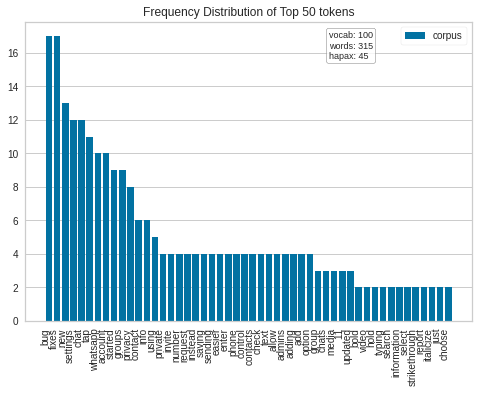

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(whatsapp_comments)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

In [ ]:
unique_whatsapp_comments = list(set(whatsapp_comments))
len(unique_whatsapp_comments)
for i in range(10):
    print(unique_whatsapp_comments[i])

Bug fixes.
* Introducing disappearing messages. Now you can set chats to disappear after 7 days.
When typing text in a chat, you can tap and hold to select the text to easily bold, strikethrough, or italicize it
Added ability to archive chats and groups
* Group voice calls now support up to 32 participants, and include an updated interface with a social audio layout, speaker highlight, and waveforms.
2.11.8
* Image and video previews have been updated so you can now see more of the media in chat.
Adding contacts using WhatsApp is now easier. You can enter a phone number and check if it's on WhatsApp before saving it. Tap "New Chat" > "New Contact" to get started.
Search messages within a specific chat: Open any chat, tap the chat name at the top to go to Contact Info/Group Info, and then tap Chat Search.
* New privacy settings allow you to control who can add you to groups. Admins will have the option of sending you a private invite instead. Go to Settings > Account > Privacy > Groups 

In [ ]:
# whatsapp_data.to_csv("whatsapp_data.csv")

#Educational Apps

##Scrape Chegg Data

In [ ]:
def cheggData(main_url, num_of_sites):
    urls = []
    version_name = []
    version_date = []
    version_comments = []
    all_comments = []
    for i in range(1, num_of_sites+1):
        url = main_url + str(i) + '/'
        urls.append(url)
    for i in range(num_of_sites):
        response = requests.get(urls[i])
        print("Website:", i+1, "Response:", response)
        soup = BeautifulSoup(response.content, 'html.parser')
        version_data = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        data_lst = []
        for i in version_data:
            if(i.a != None):
                data_lst.append(i.a.text)
                version_name.append(i.a.text)
        a = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        a = np.array(a)
        z = [str(i) for i in a]
        dates = []
        for i in z:
            x = i[i.find('(')+1:i.find(')')]
            if(x[0] == 'U'):
                dates.append(x)
                version_date.append(x)
        LL = []
        com = soup.find_all('ul', attrs = {'class': 'changes'})
        for j in com:
            L = []
            text = list(j.descendants)
            for i in range(2, len(text), 3):
                L.append(text[i])
                all_comments.append(text[i])
            LL.append(L)
            version_comments.append(L)
        val = len(data_lst)-len(LL)
        for i in range(val):
            version_comments.append("-")
    print(len(version_name))
    print(len(version_date))
    print(len(version_comments))
    df = pd.DataFrame({'version_name': version_name, 'version_date': version_date, 'version_bugs_fixes': version_comments})
    return df, all_comments

In [ ]:
chegg_data, chegg_comments = cheggData("https://www.ipa4fun.com/history/4473/", 8)

Website: 1 Response: <Response [200]>
Website: 2 Response: <Response [200]>
Website: 3 Response: <Response [200]>
Website: 4 Response: <Response [200]>
Website: 5 Response: <Response [200]>
Website: 6 Response: <Response [200]>
Website: 7 Response: <Response [200]>
Website: 8 Response: <Response [200]>
148
148
148


In [ ]:
chegg_data.shape

(148, 3)

In [ ]:
print("- Before removing the duplicates from df:",chegg_data.shape)

# Removing the list brackets from bug fixes statements.
chegg_data['version_bugs_fixes'] = chegg_data['version_bugs_fixes'].str[0]

# Removing the duplicates from the dataframe.
chegg_data = chegg_data.drop_duplicates()

# Updating the date format.
def updateDate(x):
	return x.replace("Updated: ","")
chegg_data['version_date'] = chegg_data['version_date'].apply(updateDate)

print("- After removing the duplicates from df:",chegg_data.shape)

# Blank Line
print("")
chegg_data

- Before removing the duplicates from df: (148, 3)
- After removing the duplicates from df: (141, 3)



,version_name,version_date,version_bugs_fixes
0,Chegg Study 4.14.0,"April 17, 2022",What’s new?
1,Chegg Study 4.13.0,"April 3, 2022",What’s new?
2,Chegg Study 4.12.0,"March 20, 2022",We've made bug fixes to improve your experience.
3,Chegg Study 4.11.0,"March 6, 2022",We've made bug fixes to improve your experience.
4,Chegg Study 4.10.0,"February 21, 2022",We've made bug fixes to improve your experience.
...,...,...,...
142,Chegg 2.12.0,"March 2, 2015",-
143,Chegg 2.11.1,"January 23, 2015",-
144,Chegg 2.11.0,"January 11, 2015",-
145,Chegg 2.10.0,"November 2, 2014",-


In [ ]:
chegg_comments = chegg_data['version_bugs_fixes'].tolist()
print("Before removing the '-' element from the list:",len(chegg_comments))

Before removing the '-' element from the list: 141


In [ ]:
# Removing the random words from the dataset/dataframe.
L = ['Apple', 'IOS', 'ios', 'apple', 'IOS', 'Iphone', 'iphone', '-']
for i in chegg_comments:
    if(any(email_service in i for email_service in L)):
        chegg_comments.remove(i)
print("After removing the '-' element from the list:",len(chegg_comments))

After removing the '-' element from the list: 29


In [ ]:
chegg_comments

['What’s new?',
 'What’s new?',
 "We've made bug fixes to improve your experience.",
 "We've made bug fixes to improve your experience.",
 "We've made bug fixes to improve your experience.",
 "We've made bug fixes to improve your experience.",
 'This release integrates a broader set of study tools to help support you in each of your courses, from homework to exams.',
 'This release integrates a broader set of study tools to help support you in each of your courses, from homework to exams.',
 "We've made bug fixes to improve your experience.",
 "We've made bug fixes to improve your experience.",
 "We've made bug fixes to improve your experience.",
 "We've made bug fixes to improve your experience.",
 "We've made bug fixes to improve your experience.",
 'We’ve made bug fixes to improve your experience.',
 "We've made bug fixes to improve your experience.",
 "We've made bug fixes to improve your experience.",
 'You spoke, we listened.',
 "We've made bug fixes to improve your experience.  

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(chegg_comments)
vectorizer.get_feature_names_out()

array(['add', 'added', 'answer', 'answers', 'app', 'appfeedback',
       'better', 'bookstore', 'broader', 'bug', 'buy', 'cash', 'chegg',
       'classes', 'college', 'com', 'courses', 'easier', 'easy', 'exams',
       'experience', 'expert', 'extra', 'feedback', 'fixes', 'friends',
       'hands', 'hear', 'help', 'holidays', 'homework', 'improve',
       'improved', 'improvements', 'information', 'integrates', 'isbn',
       'like', 'listened', 'll', 'love', 'make', 'money', 'needs', 'new',
       'notified', 'peasy', 'performance', 'photo', 'pocket', 'popular',
       'problem', 'problems', 'question', 'rated', 'recommended',
       'regularly', 'release', 'renting', 'right', 'scan', 'set', 'snap',
       'solution', 'solutions', 'spend', 'spoke', 'students', 'study',
       'support', 'tell', 'textbooks', 'time', 'tools', 'update', 've',
       'videos', 'walk', 'want', 'wants'], dtype=object)

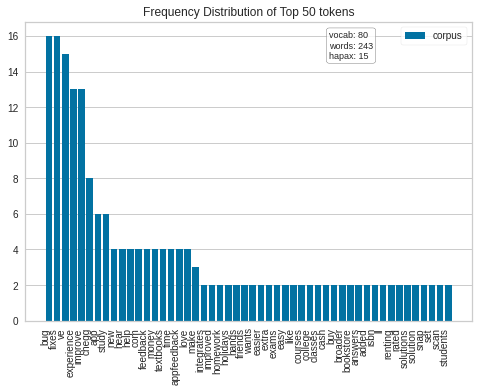

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(chegg_comments)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

In [ ]:
unique_chegg_comments = list(set(chegg_comments))
len(unique_chegg_comments)
for i in range(10):
    print(unique_chegg_comments[i])

Get notified when an expert needs more information to answer your question, and add it right in the app. Have feedback? We’d love to hear from you. AppFeedback@chegg.com
More bug fixes to make renting textbooks easier. Less time (and money!) at the bookstore = more time (and money) to spend with friends.
We’ve made bug fixes to improve your experience.
We update the app regularly so we can make it better for you.
The Chegg Study app is new & improved! You can now snap a photo of a problem to get recommended answers, and see how other students rated solutions.
Holidays = everyone wants some extra cash in pocket. When you’re done with college classes (and done with your textbooks), we want to take them off your hands. Scan your ISBN with our app, and we’ll tell you how much we’d like to buy it for. Easy peasy.
What’s new?
You spoke, we listened.
This release integrates a broader set of study tools to help support you in each of your courses, from homework to exams.
We've made bug fixes t

In [ ]:
# chegg_data.to_csv("chegg_data.csv")

##Scrape Quizlet Flashcards Data

In [ ]:
def quizletFlashcardsData(main_url, num_of_sites):
    urls = []
    version_name = []
    version_date = []
    version_comments = []
    all_comments = []
    for i in range(1, num_of_sites+1):
        url = main_url + str(i) + '/'
        urls.append(url)
    for i in range(num_of_sites):
        response = requests.get(urls[i])
        print("Website:", i+1, "Response:", response)
        soup = BeautifulSoup(response.content, 'html.parser')
        version_data = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        data_lst = []
        for i in version_data:
            if(i.a != None):
                data_lst.append(i.a.text)
                version_name.append(i.a.text)
        a = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        a = np.array(a)
        z = [str(i) for i in a]
        dates = []
        for i in z:
            x = i[i.find('(')+1:i.find(')')]
            if(x[0] == 'U'):
                dates.append(x)
                version_date.append(x)
        LL = []
        com = soup.find_all('ul', attrs = {'class': 'changes'})
        for j in com:
            L = []
            text = list(j.descendants)
            for i in range(2, len(text), 3):
                L.append(text[i])
                all_comments.append(text[i])
            LL.append(L)
            version_comments.append(L)
        val = len(data_lst)-len(LL)
        for i in range(val):
            version_comments.append("-")
    print(len(version_name))
    print(len(version_date))
    print(len(version_comments))
    df = pd.DataFrame({'version_name': version_name, 'version_date': version_date, 'version_bugs_fixes': version_comments})
    return df, all_comments

In [ ]:
quizletFlashcards_data, quizletFlashcards_comments = quizletFlashcardsData("https://www.ipa4fun.com/history/507/", 11)

Website: 1 Response: <Response [200]>
Website: 2 Response: <Response [200]>
Website: 3 Response: <Response [200]>
Website: 4 Response: <Response [200]>
Website: 5 Response: <Response [200]>
Website: 6 Response: <Response [200]>
Website: 7 Response: <Response [200]>
Website: 8 Response: <Response [200]>
Website: 9 Response: <Response [200]>
Website: 10 Response: <Response [200]>
Website: 11 Response: <Response [200]>
219
219
219


In [ ]:
quizletFlashcards_data.shape

(219, 3)

In [ ]:
print("- Before removing the duplicates from df:",quizletFlashcards_data.shape)

# Removing the list brackets from bug fixes statements.
quizletFlashcards_data['version_bugs_fixes'] = quizletFlashcards_data['version_bugs_fixes'].str[0]

# Removing the duplicates from the dataframe.
quizletFlashcards_data = quizletFlashcards_data.drop_duplicates()

# Updating the date format.
def updateDate(x):
	return x.replace("Updated: ","")
quizletFlashcards_data['version_date'] = quizletFlashcards_data['version_date'].apply(updateDate)

print("- After removing the duplicates from df:",quizletFlashcards_data.shape)

# Blank Line
print("")
quizletFlashcards_data

- Before removing the duplicates from df: (219, 3)
- After removing the duplicates from df: (209, 3)



,version_name,version_date,version_bugs_fixes
0,Quizlet Flashcards 6.19,"April 27, 2022",We’ve fixed some performance issues so studyin...
1,Quizlet Flashcards 6.18,"April 13, 2022",We’ve fixed some performance issues so studyin...
2,Quizlet Flashcards 6.17,"April 6, 2022",We’ve fixed some performance issues so studyin...
3,Quizlet Flashcards 6.16,"March 29, 2022",We’ve fixed some performance issues so studyin...
4,Quizlet Flashcards 6.15,"March 22, 2022",We’ve fixed some performance issues so studyin...
...,...,...,...
214,Quizlet Flashcards 1.7.0,"February 13, 2015",-
215,Quizlet Flashcards 1.6.1,"October 23, 2014",-
216,Quizlet Flashcards 1.6.0,"October 13, 2014",-
217,Quizlet Flashcards 1.5.2,"August 25, 2014",-


In [ ]:
quizletFlashcards_comments = quizletFlashcards_data['version_bugs_fixes'].tolist()
print("Before removing the '-' element from the list:",len(quizletFlashcards_comments))

Before removing the '-' element from the list: 209


In [ ]:
# Removing the random words from the dataset/dataframe.
L = ['Apple', 'IOS', 'ios', 'apple', 'IOS', 'Iphone', 'iphone', '-']
for i in quizletFlashcards_comments:
    if(any(email_service in i for email_service in L)):
        quizletFlashcards_comments.remove(i)
print("After removing the '-' element from the list:",len(quizletFlashcards_comments))

After removing the '-' element from the list: 43


In [ ]:
quizletFlashcards_comments

['We’ve fixed some performance issues so studying should be even smoother.',
 'We’ve fixed some performance issues so studying should be even smoother.',
 'We’ve fixed some performance issues so studying should be even smoother.',
 'We’ve fixed some performance issues so studying should be even smoother.',
 'We’ve fixed some performance issues so studying should be even smoother.',
 'We’ve fixed some performance issues so studying should be even smoother.',
 'We’ve fixed some performance issues so studying should be even smoother.',
 'We’ve fixed some performance issues so studying should be even smoother.',
 'We’ve fixed some performance issues so studying should be even smoother.',
 'We’ve fixed some performance issues so studying should be even smoother.',
 'We’ve fixed some performance issues so studying should be even smoother.',
 'Automatic username suggestions allow you to sign up more quickly and start studying right away.',
 'We’ve fixed some performance issues so studying sho

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(quizletFlashcards_comments)
vectorizer.get_feature_names_out()

array(['allow', 'anatomy', 'automatic', 'available', 'away', 'bonjour',
       'bug', 'charts', 'diagrams', 'experienced', 'fixed', 'fixes',
       'folders', 'french', 'geography', 'images', 'improvements',
       'introducing', 'ios', 'issues', 'later', 'learning', 'like',
       'maps', 'match', 'new', 'organize', 'perfect', 'performance',
       'physiology', 'portuguese', 'quickly', 'quizlet', 'require',
       'right', 'russian', 'save', 'sets', 'sharing', 'sign', 'smoother',
       'start', 'study', 'studying', 'subjects', 'suggestions', 'updated',
       'username', 'users', 've', 'way', 'здравствуйте'], dtype=object)

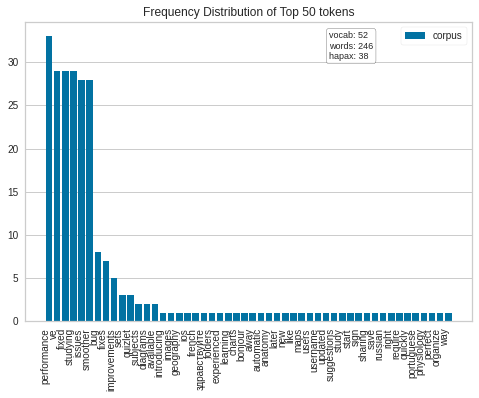

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(quizletFlashcards_comments)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

In [ ]:
unique_quizletFlashcards_comments = list(set(quizletFlashcards_comments))
len(unique_quizletFlashcards_comments)
for i in range(10):
    print(unique_quizletFlashcards_comments[i])

Automatic username suggestions allow you to sign up more quickly and start studying right away.
Introducing diagrams! See what you're learning in a whole new way. Diagrams are perfect for subjects like anatomy, physiology, geography and more that require maps, charts and images.
Match 2.0
We've updated Quizlet for iOS 9!
Fixed bug with sharing sets experienced by some users
Bug fixes
Bonjour! Здравствуйте! Quizlet is now available in French and Russian.
We’ve fixed some performance issues so studying should be even smoother.
Quizlet is now available in Portuguese!
Organize your sets into subjects and save sets to study later with Folders


In [ ]:
# quizletFlashcards_data.to_csv("quizletFlashcards_data.csv")

##Scrape Udemy Data

In [ ]:
def udemyData(main_url, num_of_sites):
    urls = []
    version_name = []
    version_date = []
    version_comments = []
    all_comments = []
    for i in range(1, num_of_sites+1):
        url = main_url + str(i) + '/'
        urls.append(url)
    for i in range(num_of_sites):
        response = requests.get(urls[i])
        print("Website:", i+1, "Response:", response)
        soup = BeautifulSoup(response.content, 'html.parser')
        version_data = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        data_lst = []
        for i in version_data:
            if(i.a != None):
                data_lst.append(i.a.text)
                version_name.append(i.a.text)
        a = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        a = np.array(a)
        z = [str(i) for i in a]
        dates = []
        for i in z:
            x = i[i.find('(')+1:i.find(')')]
            if(x[0] == 'U'):
                dates.append(x)
                version_date.append(x)
        LL = []
        com = soup.find_all('ul', attrs = {'class': 'changes'})
        for j in com:
            L = []
            text = list(j.descendants)
            for i in range(2, len(text), 3):
                L.append(text[i])
                all_comments.append(text[i])
            LL.append(L)
            version_comments.append(L)
        val = len(data_lst)-len(LL)
        for i in range(val):
            version_comments.append("-")
    print(len(version_name))
    print(len(version_date))
    print(len(version_comments))
    df = pd.DataFrame({'version_name': version_name, 'version_date': version_date, 'version_bugs_fixes': version_comments})
    return df, all_comments

In [ ]:
udemy_data, udemy_comments = udemyData("https://www.ipa4fun.com/history/109/", 10)

Website: 1 Response: <Response [200]>
Website: 2 Response: <Response [200]>
Website: 3 Response: <Response [200]>
Website: 4 Response: <Response [200]>
Website: 5 Response: <Response [200]>
Website: 6 Response: <Response [200]>
Website: 7 Response: <Response [200]>
Website: 8 Response: <Response [200]>
Website: 9 Response: <Response [200]>
Website: 10 Response: <Response [200]>
195
195
195


In [ ]:
udemy_data.shape

(195, 3)

In [ ]:
print("- Before removing the duplicates from df:",udemy_data.shape)

# Removing the list brackets from bug fixes statements.
udemy_data['version_bugs_fixes'] = udemy_data['version_bugs_fixes'].str[0]

# Removing the duplicates from the dataframe.
udemy_data = udemy_data.drop_duplicates()

# Updating the date format.
def updateDate(x):
	return x.replace("Updated: ","")
udemy_data['version_date'] = udemy_data['version_date'].apply(updateDate)

print("- After removing the duplicates from df:",udemy_data.shape)

# Blank Line
print("")
udemy_data

- Before removing the duplicates from df: (195, 3)
- After removing the duplicates from df: (186, 3)



,version_name,version_date,version_bugs_fixes
0,Udemy 8.20.0,"April 13, 2022",Thank you for learning on Udemy! This update i...
1,Udemy 8.19.1,"April 1, 2022",Thank you for learning on Udemy! This update i...
2,Udemy 8.19.0,"March 30, 2022",Thank you for learning on Udemy! This update i...
3,Udemy 8.18.0,"March 16, 2022",Thank you for learning on Udemy! This update i...
4,Udemy 8.17.0,"March 2, 2022",Thank you for learning on Udemy! This update i...
...,...,...,...
190,Udemy 2.3,"October 31, 2014",New course navigation.
191,Udemy 2.2,"September 30, 2014",Performance and user experience improvements
192,Udemy 2.1,"September 11, 2014",Chromecast support added
193,Udemy 2.0,"August 29, 2014",-


In [ ]:
udemy_comments = udemy_data['version_bugs_fixes'].tolist()
print("Before removing the '-' element from the list:",len(udemy_comments))

Before removing the '-' element from the list: 186


In [ ]:
# Removing the random words from the dataset/dataframe.
L = ['Apple', 'IOS', 'ios', 'apple', 'IOS', 'Iphone', 'iphone', '-']
for i in udemy_comments:
    if(any(email_service in i for email_service in L)):
        udemy_comments.remove(i)
print("After removing the '-' element from the list:",len(udemy_comments))

After removing the '-' element from the list: 40


In [ ]:
udemy_comments

['Thank you for learning on Udemy! This update includes bug fixes and performance improvements.',
 'Thank you for learning on Udemy! This update includes bug fixes and performance improvements.',
 'Thank you for learning on Udemy! This update includes bug fixes and performance improvements.',
 'Thank you for learning on Udemy! This update includes bug fixes and performance improvements.',
 'Thank you for learning on Udemy! This update includes bug fixes and performance improvements.',
 'Thank you for learning on Udemy! This update includes bug fixes and performance improvements.',
 'Thank you for learning on Udemy! This update includes bug fixes and performance improvements.',
 'Thank you for learning on Udemy! This update includes bug fixes and performance improvements.',
 'Thank you for learning on Udemy! This update includes bug fixes and performance improvements.',
 'Thank you for learning on Udemy! This update includes bug fixes and performance improvements.',
 'Thank you for lear

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(udemy_comments)
vectorizer.get_feature_names_out()

array(['access', 'added', 'allow', 'app', 'badge', 'bestselling',
       'browsing', 'bug', 'categories', 'chromecast', 'clearly', 'course',
       'courses', 'custom', 'easier', 'enhanced', 'experience', 'fixes',
       'going', 'heard', 'highlighted', 'home', 'improvements',
       'includes', 'instructor', 'instructors', 'introduced', 'key',
       'learning', 'liked', 'marked', 'metrics', 'minor', 'navigation',
       'new', 'performance', 'player', 'popular', 'questions', 'quizzes',
       'respond', 'sales', 'screen', 'stability', 'student', 'students',
       'support', 'thank', 'thanks', 'udemy', 'update', 'user', 'using',
       'ux', 've', 'video', 'view'], dtype=object)

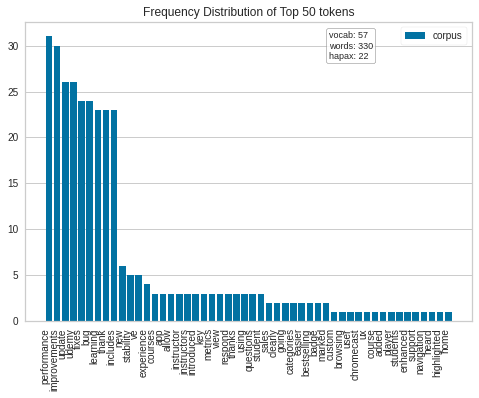

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(udemy_comments)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

In [ ]:
unique_udemy_comments = list(set(udemy_comments))
len(unique_udemy_comments)
for i in range(10):
    print(unique_udemy_comments[i])

Minor UX improvements
New course navigation.
We’ve made it easier to see what sales are going on and when they are over. Courses that are new or bestselling are also more clearly marked with a badge.
Enhanced Custom Video Player
Now you can access quizzes
As part of this update, we’ve introduced a new instructor experience that will allow instructors to respond to student questions and view key performance metrics within the app. Thanks for using Udemy!
Stability improvements and bug fixes
Chromecast support added
Performance and user experience improvements
Thank you for learning on Udemy! This update includes bug fixes and performance improvements.


In [ ]:
# udemy_data.to_csv("udemy_data.csv")

##Scrape Course Hero Data

In [ ]:
def courseHeroData(main_url, num_of_sites):
    urls = []
    version_name = []
    version_date = []
    version_comments = []
    all_comments = []
    for i in range(1, num_of_sites+1):
        url = main_url + str(i) + '/'
        urls.append(url)
    for i in range(num_of_sites):
        response = requests.get(urls[i])
        print("Website:", i+1, "Response:", response)
        soup = BeautifulSoup(response.content, 'html.parser')
        version_data = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        data_lst = []
        for i in version_data:
            if(i.a != None):
                data_lst.append(i.a.text)
                version_name.append(i.a.text)
        a = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        a = np.array(a)
        z = [str(i) for i in a]
        dates = []
        for i in z:
            x = i[i.find('(')+1:i.find(')')]
            if(x[0] == 'U'):
                dates.append(x)
                version_date.append(x)
        LL = []
        com = soup.find_all('ul', attrs = {'class': 'changes'})
        for j in com:
            L = []
            text = list(j.descendants)
            for i in range(2, len(text), 3):
                L.append(text[i])
                all_comments.append(text[i])
            LL.append(L)
            version_comments.append(L)
        val = len(data_lst)-len(LL)
        for i in range(val):
            version_comments.append("-")
    print(len(version_name))
    print(len(version_date))
    print(len(version_comments))
    df = pd.DataFrame({'version_name': version_name, 'version_date': version_date, 'version_bugs_fixes': version_comments})
    return df, all_comments

In [ ]:
courseHero_data, courseHero_comments = courseHeroData("https://www.ipa4fun.com/history/19451/", 8)

Website: 1 Response: <Response [200]>
Website: 2 Response: <Response [200]>
Website: 3 Response: <Response [200]>
Website: 4 Response: <Response [200]>
Website: 5 Response: <Response [200]>
Website: 6 Response: <Response [200]>
Website: 7 Response: <Response [200]>
Website: 8 Response: <Response [200]>
154
154
154


In [ ]:
courseHero_data.shape

(154, 3)

In [ ]:
print("- Before removing the duplicates from df:",courseHero_data.shape)

# Removing the list brackets from bug fixes statements.
courseHero_data['version_bugs_fixes'] = courseHero_data['version_bugs_fixes'].str[0]

# Removing the duplicates from the dataframe.
courseHero_data = courseHero_data.drop_duplicates()

# Updating the date format.
def updateDate(x):
	return x.replace("Updated: ","")
courseHero_data['version_date'] = courseHero_data['version_date'].apply(updateDate)

print("- After removing the duplicates from df:",courseHero_data.shape)

# Blank Line
print("")
courseHero_data

- Before removing the duplicates from df: (154, 3)
- After removing the duplicates from df: (147, 3)



,version_name,version_date,version_bugs_fixes
0,Course Hero 1.9.129,"April 18, 2022","Hi Heroes,"
1,Course Hero 1.9.128,"February 23, 2022","Hi Heroes,"
2,Course Hero 1.9.127,"February 16, 2022","Hi Heroes,"
3,Course Hero 1.9.126,"February 14, 2022","Hi Heroes,"
4,Course Hero 1.9.125,"February 3, 2022","Hi Heroes,"
...,...,...,...
149,Course Hero 1.5.1,"September 1, 2015",Bug fixes.
150,Course Hero 1.5.0,"August 5, 2015",New Product Integration We allow users to work...
151,Course Hero 1.4.0,"May 14, 2015",-
152,Course Hero 1.3.0,"April 9, 2015",-


In [ ]:
courseHero_comments = courseHero_data['version_bugs_fixes'].tolist()
print("Before removing the '-' element from the list:",len(courseHero_comments))

Before removing the '-' element from the list: 147


In [ ]:
# Removing the random words from the dataset/dataframe.
L = ['Apple', 'IOS', 'ios', 'apple', 'IOS', 'Iphone', 'iphone', '-']
for i in courseHero_comments:
    if(any(email_service in i for email_service in L)):
        courseHero_comments.remove(i)
print("After removing the '-' element from the list:",len(courseHero_comments))

After removing the '-' element from the list: 33


In [ ]:
courseHero_comments

['Hi Heroes,',
 'Hi Heroes,',
 'Hi Heroes,',
 'Hi Heroes,',
 'Hi Heroes,',
 'Hi Heroes,',
 'Hi Heroes,',
 'Hi Heroes,',
 'Hi Heroes,',
 'Hi Heroes,',
 'Hi Heroes,',
 'Hi Heroes,',
 'Hi Heroes,',
 'Hi Heroes,',
 'Hi Heroes,',
 'Hi Heroes,',
 'Hi Heroes,',
 'Hi Heroes,',
 'Hi Heroes,',
 'Hi Heroes,',
 'Hi Heroes,',
 'Hi Heroes,',
 'Hi Heroes,',
 'Hi Heroes,',
 'Hey Heroes,',
 'Hi Heroes,',
 'Bug Fixes',
 'Tutor credit notifications bug fixes.',
 'Bug Fixes',
 'Fixed a number of bugs with the Q&A flow and refined some synching issues with previous build',
 'Get fast and detailed homework help directly from our tutors, 24/7. Find existing flashcard sets or create your own to share with friends.',
 'Bug fixes.',
 'New Product Integration We allow users to work directly with tutors on the platform. Tutors help students with a variety of complex assignments and problems ranging from computer science to accounting.']

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(courseHero_comments)
vectorizer.get_feature_names_out()

array(['24', 'accounting', 'allow', 'assignments', 'bug', 'bugs', 'build',
       'complex', 'computer', 'create', 'credit', 'detailed', 'directly',
       'existing', 'fast', 'fixed', 'fixes', 'flashcard', 'flow',
       'friends', 'help', 'heroes', 'hey', 'hi', 'homework',
       'integration', 'issues', 'new', 'notifications', 'number',
       'platform', 'previous', 'problems', 'product', 'ranging',
       'refined', 'science', 'sets', 'share', 'students', 'synching',
       'tutor', 'tutors', 'users', 'variety', 'work'], dtype=object)

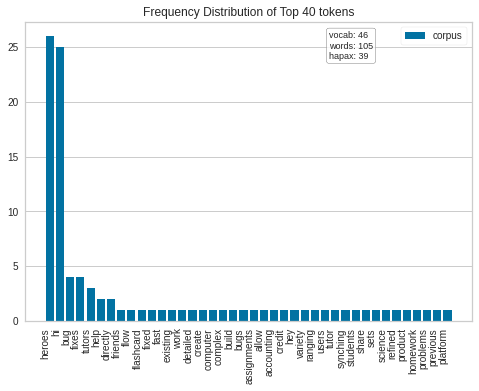

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(courseHero_comments)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', n=40)
visualizer.fit(docs)
visualizer.show()

In [ ]:
unique_courseHero_comments = list(set(courseHero_comments))
len(unique_courseHero_comments)
for i in range(8):
    print(unique_courseHero_comments[i])

Bug fixes.
New Product Integration We allow users to work directly with tutors on the platform. Tutors help students with a variety of complex assignments and problems ranging from computer science to accounting.
Fixed a number of bugs with the Q&A flow and refined some synching issues with previous build
Get fast and detailed homework help directly from our tutors, 24/7. Find existing flashcard sets or create your own to share with friends.
Bug Fixes
Hi Heroes,
Tutor credit notifications bug fixes.
Hey Heroes,


In [ ]:
# courseHero_data.to_csv("courseHero_data.csv")

##Scrape Photo Math Data

In [ ]:
def photoMathData(main_url, num_of_sites):
    urls = []
    version_name = []
    version_date = []
    version_comments = []
    all_comments = []
    for i in range(1, num_of_sites+1):
        url = main_url + str(i) + '/'
        urls.append(url)
    for i in range(num_of_sites):
        response = requests.get(urls[i])
        print("Website:", i+1, "Response:", response)
        soup = BeautifulSoup(response.content, 'html.parser')
        version_data = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        data_lst = []
        for i in version_data:
            if(i.a != None):
                data_lst.append(i.a.text)
                version_name.append(i.a.text)
        a = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        a = np.array(a)
        z = [str(i) for i in a]
        dates = []
        for i in z:
            x = i[i.find('(')+1:i.find(')')]
            if(x[0] == 'U'):
                dates.append(x)
                version_date.append(x)
        LL = []
        com = soup.find_all('ul', attrs = {'class': 'changes'})
        for j in com:
            L = []
            text = list(j.descendants)
            for i in range(2, len(text), 3):
                L.append(text[i])
                all_comments.append(text[i])
            LL.append(L)
            version_comments.append(L)
        val = len(data_lst)-len(LL)
        for i in range(val):
            version_comments.append("-")
    print(len(version_name))
    print(len(version_date))
    print(len(version_comments))
    df = pd.DataFrame({'version_name': version_name, 'version_date': version_date, 'version_bugs_fixes': version_comments})
    return df, all_comments

In [ ]:
photoMath_data, photoMath_comments = photoMathData("https://www.ipa4fun.com/history/7122/", 6)

Website: 1 Response: <Response [200]>
Website: 2 Response: <Response [200]>
Website: 3 Response: <Response [200]>
Website: 4 Response: <Response [200]>
Website: 5 Response: <Response [200]>
Website: 6 Response: <Response [200]>
116
116
116


In [ ]:
photoMath_data.shape

(116, 3)

In [ ]:
print("- Before removing the duplicates from df:",photoMath_data.shape)

# Removing the list brackets from bug fixes statements.
photoMath_data['version_bugs_fixes'] = photoMath_data['version_bugs_fixes'].str[0]

# Removing the duplicates from the dataframe.
photoMath_data = photoMath_data.drop_duplicates()

# Updating the date format.
def updateDate(x):
	return x.replace("Updated: ","")
photoMath_data['version_date'] = photoMath_data['version_date'].apply(updateDate)

print("- After removing the duplicates from df:",photoMath_data.shape)

# Blank Line
print("")
photoMath_data

- Before removing the duplicates from df: (116, 3)
- After removing the duplicates from df: (111, 3)



,version_name,version_date,version_bugs_fixes
0,PhotoMath 8.4.0,"April 10, 2022",We update the app regularly to make studying a...
1,PhotoMath 8.3.0,"March 21, 2022",We update the app regularly to make studying a...
2,PhotoMath 8.2.0,"February 27, 2022",We update the app regularly to make studying a...
3,PhotoMath 8.1.1,"February 9, 2022",We update the app regularly to make studying a...
4,PhotoMath 8.1.0,"February 5, 2022",We update the app regularly to make studying a...
...,...,...,...
111,PhotoMath 1.1.3,"December 17, 2014",-
112,PhotoMath 1.1.2,"December 12, 2014",-
113,PhotoMath 1.1.1,"November 3, 2014",-
114,PhotoMath 1.1.0,"October 25, 2014",-


In [ ]:
photoMath_comments = photoMath_data['version_bugs_fixes'].tolist()
print("Before removing the '-' element from the list:",len(photoMath_comments))

Before removing the '-' element from the list: 111


In [ ]:
# Removing the random words from the dataset/dataframe.
L = ['Apple', 'IOS', 'ios', 'apple', 'IOS', 'Iphone', 'iphone', '-']
for i in photoMath_comments:
    if(any(email_service in i for email_service in L)):
        photoMath_comments.remove(i)
print("After removing the '-' element from the list:",len(photoMath_comments))

After removing the '-' element from the list: 25


In [ ]:
photoMath_comments

['We update the app regularly to make studying as smooth as possible. Get the latest version which includes bug fixes and general improvements. Get unstuck faster, learn better, and get more time back for the other things in your life!',
 'We update the app regularly to make studying as smooth as possible. Get the latest version which includes bug fixes and general improvements. Get unstuck faster, learn better, and get more time back for the other things in your life!',
 'We update the app regularly to make studying as smooth as possible. Get the latest version which includes bug fixes and general improvements. Get unstuck faster, learn better, and get more time back for the other things in your life!',
 'We update the app regularly to make studying as smooth as possible. Get the latest version which includes bug fixes and general improvements. Get unstuck faster, learn better, and get more time back for the other things in your life!',
 'We update the app regularly to make studying a

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(photoMath_comments)
vectorizer.get_feature_names_out()

array(['added', 'app', 'better', 'bug', 'bunch', 'calculator', 'camera',
       'common', 'crash', 'crashes', 'enhancements', 'faster', 'fixed',
       'fixes', 'general', 'guise', 'guys', 'improvements', 'includes',
       'introduced', 'latest', 'learn', 'life', 'make', 'newly', 'nice',
       'occurring', 'overall', 'performance', 'possible', 'redesigned',
       'regularly', 'release', 'smooth', 'smoother', 'solver', 'sorry',
       'studying', 'things', 'time', 'unstuck', 'update', 'users', 've',
       'version'], dtype=object)

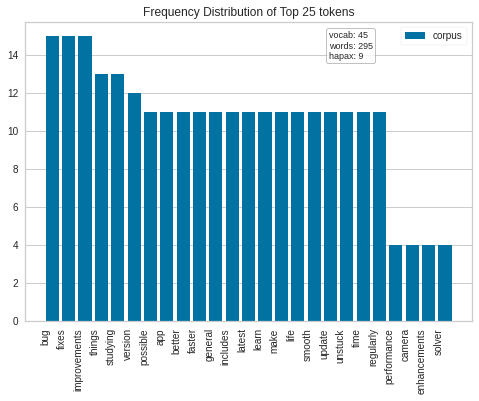

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(photoMath_comments)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', n = 25)
visualizer.fit(docs)
visualizer.show()

In [ ]:
unique_photoMath_comments = list(set(photoMath_comments))
len(unique_photoMath_comments)
for i in range(8):
    print(unique_photoMath_comments[i])

Camera/Solver improvements
We've added a bunch of nice things for you guys in this release:
We update the app regularly to make studying as smooth as possible. Get the latest version which includes bug fixes and general improvements. Get unstuck faster, learn better, and get more time back for the other things in your life!
Bug fixes and overall performance enhancements
Fixed common occurring crashes
We've added a bunch of nice things for you guise in this release:
Newly redesigned calculator
Fixed crash for some users introduced by last version, sorry about that


In [ ]:
# photoMath_data.to_csv("photoMath_data.csv")

#Gaming Apps

##Scrape Ludo King Data

In [ ]:
def ludoKingData(main_url, num_of_sites):
    urls = []
    version_name = []
    version_date = []
    version_comments = []
    all_comments = []
    for i in range(1, num_of_sites+1):
        url = main_url + str(i) + '/'
        urls.append(url)
    for i in range(num_of_sites):
        response = requests.get(urls[i])
        print("Website:", i+1, "Response:", response)
        soup = BeautifulSoup(response.content, 'html.parser')
        version_data = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        data_lst = []
        for i in version_data:
            if(i.a != None):
                data_lst.append(i.a.text)
                version_name.append(i.a.text)
        a = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        a = np.array(a)
        z = [str(i) for i in a]
        dates = []
        for i in z:
            x = i[i.find('(')+1:i.find(')')]
            if(x[0] == 'U'):
                dates.append(x)
                version_date.append(x)
        LL = []
        com = soup.find_all('ul', attrs = {'class': 'changes'})
        for j in com:
            L = []
            text = list(j.descendants)
            for i in range(2, len(text), 3):
                L.append(text[i])
                all_comments.append(text[i])
            LL.append(L)
            version_comments.append(L)
        val = len(data_lst)-len(LL)
        for i in range(val):
            version_comments.append("-")
    print(len(version_name))
    print(len(version_date))
    print(len(version_comments))
    df = pd.DataFrame({'version_name': version_name, 'version_date': version_date, 'version_bugs_fixes': version_comments})
    return df, all_comments

In [ ]:
ludoKing_data, ludoKing_comments = ludoKingData("https://www.ipa4fun.com/history/284819/", 2)

Website: 1 Response: <Response [200]>
Website: 2 Response: <Response [200]>
28
28
28


In [ ]:
ludoKing_data.shape

(28, 3)

In [ ]:
print("- Before removing the duplicates from df:",ludoKing_data.shape)

# Removing the list brackets from bug fixes statements.
ludoKing_data['version_bugs_fixes'] = ludoKing_data['version_bugs_fixes'].str[0]

# Removing the duplicates from the dataframe.
ludoKing_data = ludoKing_data.drop_duplicates()

# Updating the date format.
def updateDate(x):
	return x.replace("Updated: ","")
ludoKing_data['version_date'] = ludoKing_data['version_date'].apply(updateDate)

print("- After removing the duplicates from df:",ludoKing_data.shape)

# Blank Line
print("")
ludoKing_data

- Before removing the duplicates from df: (28, 3)
- After removing the duplicates from df: (27, 3)



,version_name,version_date,version_bugs_fixes
0,Ludo King 6.0,"April 22, 2022",Bug Fixes
1,Ludo King 5.9,"March 16, 2022",Rematch Functionality Available
2,Ludo King 5.8,"February 4, 2022",-Lagging issue is fixed.
3,Ludo King 5.7,"January 5, 2022",- bug fixes
4,Ludo King 5.6,"November 11, 2021",NEW Tournament Mode Added
5,Ludo King 5.5,"September 25, 2021",-
6,Ludo King 5.4,"September 8, 2021",-
7,Ludo King 5.3,"August 19, 2021",-
8,Ludo King 5.2,"July 17, 2021",-
9,Ludo King 5.1,"May 30, 2021",-


In [ ]:
ludoKing_comments = ludoKing_data['version_bugs_fixes'].tolist()
print("Before removing the '-' element from the list:",len(ludoKing_comments))

Before removing the '-' element from the list: 27


In [ ]:
# Removing the random words from the dataset/dataframe.
L = ['Apple', 'IOS', 'ios', 'apple', 'IOS', 'Iphone', 'iphone', '-']
for i in ludoKing_comments:
    if(any(email_service in i for email_service in L)):
        ludoKing_comments.remove(i)
print("After removing the '-' element from the list:",len(ludoKing_comments))

After removing the '-' element from the list: 6


In [ ]:
ludoKing_comments

['Bug Fixes',
 'Rematch Functionality Available',
 'NEW Tournament Mode Added',
 '- Game optimized',
 'Thanks for Playing Ludo King!',
 '-']

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(ludoKing_comments)
vectorizer.get_feature_names_out()

array(['added', 'available', 'bug', 'chat', 'fixes', 'for',
       'functionality', 'game', 'king', 'ludo', 'mode', 'new',
       'optimized', 'playing', 'rematch', 'thanks', 'tournament', 'voice'],
      dtype=object)

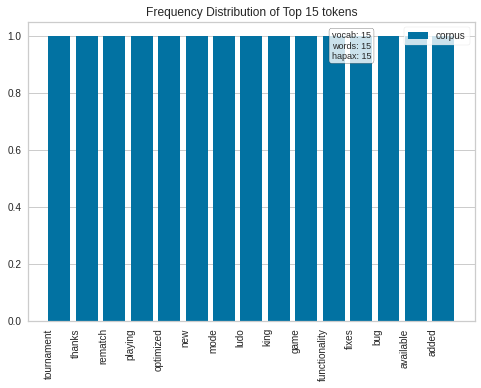

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(ludoKing_comments)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', n=15)
visualizer.fit(docs)
visualizer.show()

In [ ]:
unique_ludoKing_comments = list(set(ludoKing_comments))
len(unique_ludoKing_comments)
for i in range(5):
    print(unique_ludoKing_comments[i])

- Game optimized
Bug Fixes
NEW Tournament Mode Added
-
Thanks for Playing Ludo King!


In [ ]:
# ludoKing_data.to_csv("ludoKing_data.csv")

##Scrape Clash of Clans Data

In [ ]:
def clashOfClansData(main_url, num_of_sites):
    urls = []
    version_name = []
    version_date = []
    version_comments = []
    all_comments = []
    for i in range(1, num_of_sites+1):
        url = main_url + str(i) + '/'
        urls.append(url)
    for i in range(num_of_sites):
        response = requests.get(urls[i])
        print("Website:", i+1, "Response:", response)
        soup = BeautifulSoup(response.content, 'html.parser')
        version_data = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        data_lst = []
        for i in version_data:
            if(i.a != None):
                data_lst.append(i.a.text)
                version_name.append(i.a.text)
        a = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        a = np.array(a)
        z = [str(i) for i in a]
        dates = []
        for i in z:
            x = i[i.find('(')+1:i.find(')')]
            if(x[0] == 'U'):
                dates.append(x)
                version_date.append(x)
        LL = []
        com = soup.find_all('ul', attrs = {'class': 'changes'})
        for j in com:
            L = []
            text = list(j.descendants)
            for i in range(2, len(text), 3):
                L.append(text[i])
                all_comments.append(text[i])
            LL.append(L)
            version_comments.append(L)
        val = len(data_lst)-len(LL)
        for i in range(val):
            version_comments.append("-")
    print(len(version_name))
    print(len(version_date))
    print(len(version_comments))
    df = pd.DataFrame({'version_name': version_name, 'version_date': version_date, 'version_bugs_fixes': version_comments})
    return df, all_comments

In [ ]:
clashOfClans_data, clashOfClans_comments = clashOfClansData("https://www.ipa4fun.com/history/606/", 7)

Website: 1 Response: <Response [200]>
Website: 2 Response: <Response [200]>
Website: 3 Response: <Response [200]>
Website: 4 Response: <Response [200]>
Website: 5 Response: <Response [200]>
Website: 6 Response: <Response [200]>
Website: 7 Response: <Response [200]>
132
132
132


In [ ]:
clashOfClans_data.shape

(132, 3)

In [ ]:
print("- Before removing the duplicates from df:",clashOfClans_data.shape)

# Removing the list brackets from bug fixes statements.
clashOfClans_data['version_bugs_fixes'] = clashOfClans_data['version_bugs_fixes'].str[0]

# Removing the duplicates from the dataframe.
clashOfClans_data = clashOfClans_data.drop_duplicates()

# Updating the date format.
def updateDate(x):
	return x.replace("Updated: ","")
clashOfClans_data['version_date'] = clashOfClans_data['version_date'].apply(updateDate)

print("- After removing the duplicates from df:",clashOfClans_data.shape)

# Blank Line
print("")
clashOfClans_data

- Before removing the duplicates from df: (132, 3)
- After removing the duplicates from df: (126, 3)



,version_name,version_date,version_bugs_fixes
0,Clash of Clans 14.426.5,"April 21, 2022",Various minor bug fixes and improvements
1,Clash of Clans 14.426.4,"March 17, 2022",Various minor bug fixes and improvements
2,Clash of Clans 14.426.3,"February 24, 2022",New Features:
3,Clash of Clans 14.426.1,"February 16, 2022",New Features:
4,Clash of Clans 14.211.9,"November 14, 2021",Various minor bug fixes and improvements
...,...,...,...
127,Clash of Clans 6.322.5,"November 23, 2014",Clash of Clans is proud to be a (PRODUCT)RED™ ...
128,Clash of Clans 6.322.3,"November 5, 2014",Removed Halloween content.
129,Clash of Clans 6.322,"October 22, 2014",A spooky update has descended upon Clash! What...
130,Clash of Clans 6.253.4,"September 16, 2014",-


In [ ]:
clashOfClans_comments = clashOfClans_data['version_bugs_fixes'].tolist()
print("Before removing the '-' element from the list:",len(clashOfClans_comments))

Before removing the '-' element from the list: 126


In [ ]:
# Removing the random words from the dataset/dataframe.
L = ['Apple', 'IOS', 'ios', 'apple', 'IOS', 'Iphone', 'iphone', '-']
for i in clashOfClans_comments:
    if(any(email_service in i for email_service in L)):
        clashOfClans_comments.remove(i)
print("After removing the '-' element from the list:",len(clashOfClans_comments))

After removing the '-' element from the list: 28


In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(clashOfClans_comments)
vectorizer.get_feature_names_out()

array(['105', '11', '49', 'app', 'apps', 'barracks', 'biggest', 'brand',
       'bug', 'clan', 'clans', 'clash', 'content', 'dark', 'descended',
       'features', 'fixes', 'flurry', 'friends', 'frightful', 'halloween',
       'hit', 'huge', 'improvements', 'leagues', 'lie', 'like', 'minor',
       'moved', 'new', 'newest', 'night', 'partner', 'play', 'prepare',
       'product', 'proud', 'red', 'removed', 'snowstorm', 'spooky',
       'store', 'time', 'treats', 'tricks', 'troop', 'update', 'various',
       'war', 'year'], dtype=object)

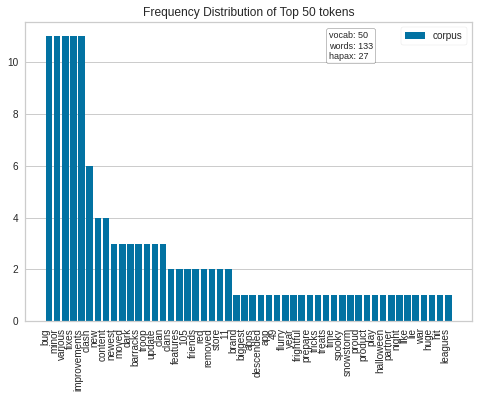

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(clashOfClans_comments)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

In [ ]:
unique_clashOfClans_comments = list(set(clashOfClans_comments))
len(unique_clashOfClans_comments)
for i in range(10):
    print(unique_clashOfClans_comments[i])

It's time for Clash's frightful night!
Play a huge update full of brand new content!
The biggest update of the year has hit like a snowstorm and it’s a flurry of new content!
Clash’s newest troop has moved into the Dark Barracks!
Removed Apps for (RED) content.
Clash of Clans is proud to be a (PRODUCT)RED™ App Store partner.
New Features:
9.105.9
9.105.11
A spooky update has descended upon Clash! What tricks and treats lie in store?


In [ ]:
# clashOfClans_data.to_csv("clashOfClans_data.csv")

##Scrape Asphalt 8: Airborne Data

In [ ]:
def asphaltAirborneData(main_url, num_of_sites):
    urls = []
    version_name = []
    version_date = []
    version_comments = []
    all_comments = []
    for i in range(1, num_of_sites+1):
        url = main_url + str(i) + '/'
        urls.append(url)
    for i in range(num_of_sites):
        response = requests.get(urls[i])
        print("Website:", i+1, "Response:", response)
        soup = BeautifulSoup(response.content, 'html.parser')
        version_data = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        data_lst = []
        for i in version_data:
            if(i.a != None):
                data_lst.append(i.a.text)
                version_name.append(i.a.text)
        a = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        a = np.array(a)
        z = [str(i) for i in a]
        dates = []
        for i in z:
            x = i[i.find('(')+1:i.find(')')]
            if(x[0] == 'U'):
                dates.append(x)
                version_date.append(x)
        LL = []
        com = soup.find_all('ul', attrs = {'class': 'changes'})
        for j in com:
            L = []
            text = list(j.descendants)
            for i in range(2, len(text), 3):
                L.append(text[i])
                all_comments.append(text[i])
            LL.append(L)
            version_comments.append(L)
        val = len(data_lst)-len(LL)
        for i in range(val):
            version_comments.append("-")
    print(len(version_name))
    print(len(version_date))
    print(len(version_comments))
    df = pd.DataFrame({'version_name': version_name, 'version_date': version_date, 'version_bugs_fixes': version_comments})
    return df, all_comments

In [ ]:
asphaltAirborne_data, asphaltAirborne_comments = asphaltAirborneData("https://www.ipa4fun.com/history/44/", 4)

Website: 1 Response: <Response [200]>
Website: 2 Response: <Response [200]>
Website: 3 Response: <Response [200]>
Website: 4 Response: <Response [200]>
67
67
67


In [ ]:
asphaltAirborne_data.shape

(67, 3)

In [ ]:
print("- Before removing the duplicates from df:",asphaltAirborne_data.shape)

# Removing the list brackets from bug fixes statements.
asphaltAirborne_data['version_bugs_fixes'] = asphaltAirborne_data['version_bugs_fixes'].str[0]

# Removing the duplicates from the dataframe.
asphaltAirborne_data = asphaltAirborne_data.drop_duplicates()

# Updating the date format.
def updateDate(x):
	return x.replace("Updated: ","")
asphaltAirborne_data['version_date'] = asphaltAirborne_data['version_date'].apply(updateDate)

print("- After removing the duplicates from df:",asphaltAirborne_data.shape)

# Blank Line
print("")
asphaltAirborne_data

- Before removing the duplicates from df: (67, 3)
- After removing the duplicates from df: (64, 3)



,version_name,version_date,version_bugs_fixes
0,Asphalt 8: Airborne 6.2.3,"April 18, 2022","The newest update is rolling fast, along with ..."
1,Asphalt 8: Airborne 6.2.0,"January 25, 2022",Chinese New Year brings the promise of new cha...
2,Asphalt 8: Airborne 6.1.0,"December 22, 2021","What’s that chill? Is it the winter, or just t..."
3,Asphalt 8: Airborne 6.0.0,"November 23, 2021",In order to ensure Asphalt 8 runs as smoothly ...
4,Asphalt 8: Airborne 5.9.2,"October 29, 2021",Asphalt 8: Airborne is celebrating its 8th ann...
...,...,...,...
61,Asphalt 8: Airborne 1.7.2,"December 17, 2014",-
63,Asphalt 8: Airborne 1.6.2,"October 28, 2014","Brace yourselves: Halloween is coming, and in ..."
64,Asphalt 8: Airborne 1.6.1,"September 17, 2014",Discover the BIGGEST update for Asphalt 8: Air...
65,Asphalt 8: Airborne 1.5.0,"August 27, 2014",Tear up the asphalt with this brand-new and ex...


In [ ]:
asphaltAirborne_comments = asphaltAirborne_data['version_bugs_fixes'].tolist()
print("Before removing the '-' element from the list:",len(asphaltAirborne_comments))

Before removing the '-' element from the list: 64


In [ ]:
# Removing the random words from the dataset/dataframe.
L = ['Apple', 'IOS', 'ios', 'apple', 'IOS', 'Iphone', 'iphone', '-']
for i in asphaltAirborne_comments:
    if(any(email_service in i for email_service in L)):
        asphaltAirborne_comments.remove(i)
print("After removing the '-' element from the list:",len(asphaltAirborne_comments))

After removing the '-' element from the list: 8


In [ ]:
asphaltAirborne_comments

['The newest update is rolling fast, along with some changes inspired by our community:',
 'Chinese New Year brings the promise of new challenges, competitions, and prizes for everyone in Asphalt 8. Go get ‘em, Tiger!',
 'What’s that chill? Is it the winter, or just the cold stares of your rivals? Either way, it’s your chance to melt the competition in this hot holiday update!',
 'In order to ensure Asphalt 8 runs as smoothly and seamlessly as possible, we\'ve successfully made lots of improvements for pure performance and high stability. And yes, by popular demand, the ""Claim All"" icon is finally live.',
 'Ho, ho, ho! A coldsnap is blowing in at top speed. Are you prepared to warm things up with some holiday heat?',
 'Join in for a spooky night ride across Transylvania! The Halloween update is here!',
 'Brace yourselves: Halloween is coming, and in Asphalt 8, the monsters of speed are ready!',
 'Discover the BIGGEST update for Asphalt 8: Airborne since it launched!']

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(asphaltAirborne_comments)
vectorizer.get_feature_names_out()

array(['airborne', 'asphalt', 'biggest', 'blowing', 'brace', 'brings',
       'challenges', 'chance', 'changes', 'chill', 'chinese', 'claim',
       'cold', 'coldsnap', 'coming', 'community', 'competition',
       'competitions', 'demand', 'discover', 'em', 'ensure', 'fast',
       'finally', 'halloween', 'heat', 'high', 'ho', 'holiday', 'hot',
       'icon', 'improvements', 'inspired', 'join', 'just', 'launched',
       'live', 'lots', 'melt', 'monsters', 'new', 'newest', 'night',
       'order', 'performance', 'popular', 'possible', 'prepared',
       'prizes', 'promise', 'pure', 'ready', 'ride', 'rivals', 'rolling',
       'runs', 'seamlessly', 'smoothly', 'speed', 'spooky', 'stability',
       'stares', 'successfully', 'things', 'tiger', 'transylvania',
       'update', 've', 'warm', 'way', 'winter', 'year', 'yes'],
      dtype=object)

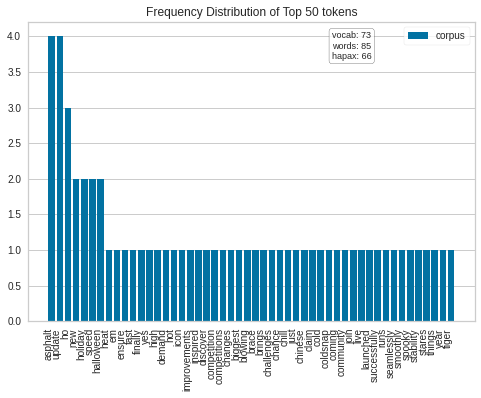

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(asphaltAirborne_comments)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

In [ ]:
unique_asphaltAirborne_comments = list(set(asphaltAirborne_comments))
len(unique_asphaltAirborne_comments)
for i in range(8):
    print(unique_asphaltAirborne_comments[i])

Brace yourselves: Halloween is coming, and in Asphalt 8, the monsters of speed are ready!
Ho, ho, ho! A coldsnap is blowing in at top speed. Are you prepared to warm things up with some holiday heat?
Chinese New Year brings the promise of new challenges, competitions, and prizes for everyone in Asphalt 8. Go get ‘em, Tiger!
The newest update is rolling fast, along with some changes inspired by our community:
Join in for a spooky night ride across Transylvania! The Halloween update is here!
Discover the BIGGEST update for Asphalt 8: Airborne since it launched!
In order to ensure Asphalt 8 runs as smoothly and seamlessly as possible, we've successfully made lots of improvements for pure performance and high stability. And yes, by popular demand, the ""Claim All"" icon is finally live.
What’s that chill? Is it the winter, or just the cold stares of your rivals? Either way, it’s your chance to melt the competition in this hot holiday update!


In [ ]:
# asphaltAirborne_data.to_csv("asphaltAirborne_data.csv")

##Scrape Candy Crush Saga Data

In [ ]:
def candyCrushData(main_url, num_of_sites):
    urls = []
    version_name = []
    version_date = []
    version_comments = []
    all_comments = []
    for i in range(1, num_of_sites+1):
        url = main_url + str(i) + '/'
        urls.append(url)
    for i in range(num_of_sites):
        response = requests.get(urls[i])
        print("Website:", i+1, "Response:", response)
        soup = BeautifulSoup(response.content, 'html.parser')
        version_data = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        data_lst = []
        for i in version_data:
            if(i.a != None):
                data_lst.append(i.a.text)
                version_name.append(i.a.text)
        a = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        a = np.array(a)
        z = [str(i) for i in a]
        dates = []
        for i in z:
            x = i[i.find('(')+1:i.find(')')]
            if(x[0] == 'U'):
                dates.append(x)
                version_date.append(x)
        LL = []
        com = soup.find_all('ul', attrs = {'class': 'changes'})
        for j in com:
            L = []
            text = list(j.descendants)
            for i in range(2, len(text), 3):
                L.append(text[i])
                all_comments.append(text[i])
            LL.append(L)
            version_comments.append(L)
        val = len(data_lst)-len(LL)
        for i in range(val):
            version_comments.append("-")
    print(len(version_name))
    print(len(version_date))
    print(len(version_comments))
    df = pd.DataFrame({'version_name': version_name, 'version_date': version_date, 'version_bugs_fixes': version_comments})
    return df, all_comments

In [ ]:
candyCrush_data, candyCrush_comments = candyCrushData("https://www.ipa4fun.com/history/294/", 10)

Website: 1 Response: <Response [200]>
Website: 2 Response: <Response [200]>
Website: 3 Response: <Response [200]>
Website: 4 Response: <Response [200]>
Website: 5 Response: <Response [200]>
Website: 6 Response: <Response [200]>
Website: 7 Response: <Response [200]>
Website: 8 Response: <Response [200]>
Website: 9 Response: <Response [200]>
Website: 10 Response: <Response [200]>
207
207
207


In [ ]:
candyCrush_data.shape

(207, 3)

In [ ]:
print("- Before removing the duplicates from df:",candyCrush_data.shape)

# Removing the list brackets from bug fixes statements.
candyCrush_data['version_bugs_fixes'] = candyCrush_data['version_bugs_fixes'].str[0]

# Removing the duplicates from the dataframe.
candyCrush_data = candyCrush_data.drop_duplicates()

# Updating the date format.
def updateDate(x):
	return x.replace("Updated: ","")
candyCrush_data['version_date'] = candyCrush_data['version_date'].apply(updateDate)

print("- After removing the duplicates from df:",candyCrush_data.shape)

# Blank Line
print("")
candyCrush_data

- Before removing the duplicates from df: (207, 3)
- After removing the duplicates from df: (198, 3)



,version_name,version_date,version_bugs_fixes
0,Candy Crush Saga 1.226.0.1,"April 28, 2022",We hope you’re having fun playing Candy Crush ...
1,Candy Crush Saga 1.225.0.1,"April 19, 2022",We hope you’re having fun playing Candy Crush ...
2,Candy Crush Saga 1.224.0.1,"April 5, 2022",We hope you’re having fun playing Candy Crush ...
3,Candy Crush Saga 1.223.1.1,"March 21, 2022",We hope you’re having fun playing Candy Crush ...
4,Candy Crush Saga 1.222.0.2,"March 3, 2022",We hope you’re having fun playing Candy Crush ...
...,...,...,...
202,Candy Crush Saga 1.38.1,"September 20, 2014",-
203,Candy Crush Saga 1.37.0,"September 9, 2014",-
204,Candy Crush Saga 1.36.2,"August 27, 2014",-
205,Candy Crush Saga 1.36.1,"August 26, 2014",-


In [ ]:
candyCrush_comments = candyCrush_data['version_bugs_fixes'].tolist()
print("Before removing the '-' element from the list:",len(candyCrush_comments))

Before removing the '-' element from the list: 198


In [ ]:
# Removing the random words from the dataset/dataframe.
L = ['Apple', 'IOS', 'ios', 'apple', 'IOS', 'Iphone', 'iphone', '-']
for i in candyCrush_comments:
    if(any(email_service in i for email_service in L)):
        candyCrush_comments.remove(i)
print("After removing the '-' element from the list:",len(candyCrush_comments))

After removing the '-' element from the list: 41


In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(candyCrush_comments)
vectorizer.get_feature_names_out()

array(['15', 'adds', 'ahoy', 'better', 'brand', 'candy', 'close', 'coast',
       'come', 'crumbly', 'crumbs', 'crush', 'divine', 'don', 'double',
       'download', 'embark', 'encounter', 'episode', 'episodes',
       'factory', 'features', 'fizzy', 'forget', 'fun', 'game', 'having',
       'hope', 'join', 'kind', 'know', 'latest', 'levels', 'new',
       'newest', 'oh', 'playing', 'rainbow', 'ready', 'saga',
       'scrumptious', 'studio', 'sugary', 'sweet', 'taking', 'talking',
       'tasty', 'time', 'tops', 'tried', 'update', 'version', 'week',
       'welcoming', 'world'], dtype=object)

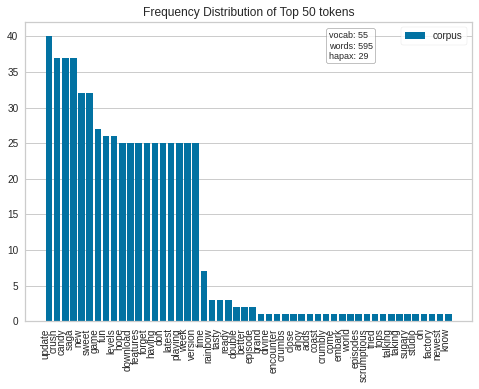

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(candyCrush_comments)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

In [ ]:
unique_candyCrush_comments = list(set(candyCrush_comments))
len(unique_candyCrush_comments)
for i in range(10):
    print(unique_candyCrush_comments[i])

Are you ready? It’s time for a Candy Crush Saga update!
Have you already tried the game everyone is talking about? Come join the fun!
Get ready for a DIVINE update!
Oh crumbs! It’s time for a new Candy Crush Saga update in our new episode, Crumbly Coast!
It's time for a sweet Candy Crush Saga update!
We hope you’re having fun playing Candy Crush Saga! We update the game every week so don't forget to download the latest version to get all the sweet new features and levels!
In this update we’re welcoming you to our newest episodes, Fizzy Factory and Tasty Tops!
Do you know what’s better than a rainbow? A double rainbow! And even better than a double rainbow? The new Candy Crush Saga update!
Ahoy! Time to embark on a new Candy Crush Saga update!
SWEET! We have a Candy Crush Saga update!


In [ ]:
# candyCrush_data.to_csv("candyCrush_data.csv")

##Scrape Hill Climb Racing Data

In [ ]:
def hillClimbRacingData(main_url, num_of_sites):
    urls = []
    version_name = []
    version_date = []
    version_comments = []
    all_comments = []
    for i in range(1, num_of_sites+1):
        url = main_url + str(i) + '/'
        urls.append(url)
    for i in range(num_of_sites):
        response = requests.get(urls[i])
        print("Website:", i+1, "Response:", response)
        soup = BeautifulSoup(response.content, 'html.parser')
        version_data = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        data_lst = []
        for i in version_data:
            if(i.a != None):
                data_lst.append(i.a.text)
                version_name.append(i.a.text)
        a = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        a = np.array(a)
        z = [str(i) for i in a]
        dates = []
        for i in z:
            x = i[i.find('(')+1:i.find(')')]
            if(x[0] == 'U'):
                dates.append(x)
                version_date.append(x)
        LL = []
        com = soup.find_all('ul', attrs = {'class': 'changes'})
        for j in com:
            L = []
            text = list(j.descendants)
            for i in range(2, len(text), 3):
                L.append(text[i])
                all_comments.append(text[i])
            LL.append(L)
            version_comments.append(L)
        val = len(data_lst)-len(LL)
        for i in range(val):
            version_comments.append("-")
    print(len(version_name))
    print(len(version_date))
    print(len(version_comments))
    df = pd.DataFrame({'version_name': version_name, 'version_date': version_date, 'version_bugs_fixes': version_comments})
    return df, all_comments

In [ ]:
hillClimbRacing_data, hillClimbRacing_comments = hillClimbRacingData("https://www.ipa4fun.com/history/21/", 3)

Website: 1 Response: <Response [200]>
Website: 2 Response: <Response [200]>
Website: 3 Response: <Response [200]>
59
59
59


In [ ]:
hillClimbRacing_data.shape

(59, 3)

In [ ]:
print("- Before removing the duplicates from df:",hillClimbRacing_data.shape)

# Removing the list brackets from bug fixes statements.
hillClimbRacing_data['version_bugs_fixes'] = hillClimbRacing_data['version_bugs_fixes'].str[0]

# Removing the duplicates from the dataframe.
hillClimbRacing_data = hillClimbRacing_data.drop_duplicates()

# Updating the date format.
def updateDate(x):
	return x.replace("Updated: ","")
hillClimbRacing_data['version_date'] = hillClimbRacing_data['version_date'].apply(updateDate)

print("- After removing the duplicates from df:",hillClimbRacing_data.shape)

# Blank Line
print("")
hillClimbRacing_data

- Before removing the duplicates from df: (59, 3)
- After removing the duplicates from df: (57, 3)



,version_name,version_date,version_bugs_fixes
0,Hill Climb Racing 1.54.2,"April 20, 2022",New Level - Action hero
1,Hill Climb Racing 1.54.1,"March 30, 2022",- New Level: Action hero
2,Hill Climb Racing 1.53.0,"December 13, 2021",- New Vehicle: FAST CAR
3,Hill Climb Racing 1.52.0,"November 16, 2021",- Power up your life with more power! Fly thro...
4,Hill Climb Racing 1.51.0,"October 5, 2021",- New Level: Suburbs
5,Hill Climb Racing 1.50.0,"June 18, 2021",-
6,Hill Climb Racing 1.49.1,"April 28, 2021",-
7,Hill Climb Racing 1.49.0,"April 22, 2021",-
8,Hill Climb Racing 1.48.0,"December 14, 2020",-
9,Hill Climb Racing 1.47.5,"December 1, 2020",-


In [ ]:
hillClimbRacing_comments = hillClimbRacing_data['version_bugs_fixes'].tolist()
print("Before removing the '-' element from the list:",len(hillClimbRacing_comments))

Before removing the '-' element from the list: 57


In [ ]:
# Removing the random words from the dataset/dataframe.
L = ['Apple', 'IOS', 'ios', 'apple', 'IOS', 'Iphone', 'iphone', '-']
for i in hillClimbRacing_comments:
    if(any(email_service in i for email_service in L)):
        hillClimbRacing_comments.remove(i)
print("After removing the '-' element from the list:",len(hillClimbRacing_comments))

After removing the '-' element from the list: 8


In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(hillClimbRacing_comments)
vectorizer.get_feature_names_out()

array(['bug', 'car', 'corrections', 'electric', 'error', 'fixes',
       'improvements', 'level', 'neon', 'new', 'rocket', 'seasons',
       'usability', 'various', 'vehicle'], dtype=object)

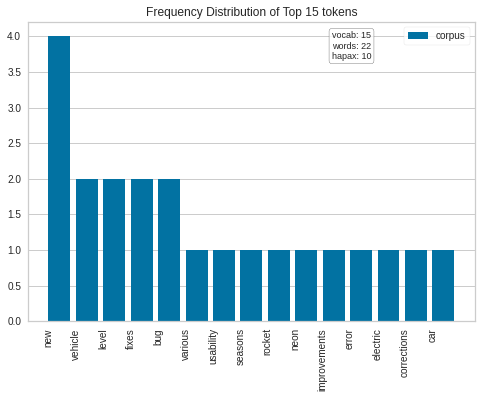

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(hillClimbRacing_comments)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', n=15)
visualizer.fit(docs)
visualizer.show()

In [ ]:
unique_hillClimbRacing_comments = list(set(hillClimbRacing_comments))
len(unique_hillClimbRacing_comments)
for i in range(8):
    print(unique_hillClimbRacing_comments[i])

New Level: Neon
New vehicle, Electric car
New level: Seasons
Error corrections
Bug fixes
New Vehicle: The Rocket
Various Bug fixes
Usability improvements


In [ ]:
# hillClimbRacing_data.to_csv("hillClimbRacing_data.csv")

#Utility Apps

##Scrape Google Maps Data

In [ ]:
def googleMapsData(main_url, num_of_sites):
    urls = []
    version_name = []
    version_date = []
    version_comments = []
    all_comments = []
    for i in range(1, num_of_sites+1):
        url = main_url + str(i) + '/'
        urls.append(url)
    for i in range(num_of_sites):
        response = requests.get(urls[i])
        print("Website:", i+1, "Response:", response)
        soup = BeautifulSoup(response.content, 'html.parser')
        version_data = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        data_lst = []
        for i in version_data:
            if(i.a != None):
                data_lst.append(i.a.text)
                version_name.append(i.a.text)
        a = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        a = np.array(a)
        z = [str(i) for i in a]
        dates = []
        for i in z:
            x = i[i.find('(')+1:i.find(')')]
            if(x[0] == 'U'):
                dates.append(x)
                version_date.append(x)
        LL = []
        com = soup.find_all('ul', attrs = {'class': 'changes'})
        for j in com:
            L = []
            text = list(j.descendants)
            for i in range(2, len(text), 3):
                L.append(text[i])
                all_comments.append(text[i])
            LL.append(L)
            version_comments.append(L)
        val = len(data_lst)-len(LL)
        for i in range(val):
            version_comments.append("-")
    print(len(version_name))
    print(len(version_date))
    print(len(version_comments))
    df = pd.DataFrame({'version_name': version_name, 'version_date': version_date, 'version_bugs_fixes': version_comments})
    return df, all_comments

In [ ]:
googleMaps_data, googleMaps_comments = googleMapsData("https://www.ipa4fun.com/history/39/", 9)

Website: 1 Response: <Response [200]>
Website: 2 Response: <Response [200]>
Website: 3 Response: <Response [200]>
Website: 4 Response: <Response [200]>
Website: 5 Response: <Response [200]>
Website: 6 Response: <Response [200]>
Website: 7 Response: <Response [200]>
Website: 8 Response: <Response [200]>
Website: 9 Response: <Response [200]>
184
184
184


In [ ]:
googleMaps_data.shape

(184, 3)

In [ ]:
print("- Before removing the duplicates from df:",googleMaps_data.shape)

# Removing the list brackets from bug fixes statements.
googleMaps_data['version_bugs_fixes'] = googleMaps_data['version_bugs_fixes'].str[0]

# Removing the duplicates from the dataframe.
googleMaps_data = googleMaps_data.drop_duplicates()

# Updating the date format.
def updateDate(x):
	return x.replace("Updated: ","")
googleMaps_data['version_date'] = googleMaps_data['version_date'].apply(updateDate)

print("- After removing the duplicates from df:",googleMaps_data.shape)

# Blank Line
print("")
googleMaps_data

- Before removing the duplicates from df: (184, 3)
- After removing the duplicates from df: (177, 3)



,version_name,version_date,version_bugs_fixes
0,Google Maps 6.14,"April 18, 2022",Thanks for using Google Maps! This release bri...
1,Google Maps 6.13,"April 11, 2022",Thanks for using Google Maps! This release bri...
2,Google Maps 6.12,"April 4, 2022",Thanks for using Google Maps! This release bri...
3,Google Maps 6.11,"March 28, 2022",Thanks for using Google Maps! This release bri...
4,Google Maps 6.10,"March 21, 2022",Thanks for using Google Maps! This release bri...
...,...,...,...
179,Google Maps 4.1.1,"December 17, 2014",-
180,Google Maps 4.1.0,"December 5, 2014",-
181,Google Maps 4.0.0,"November 6, 2014",-
182,Google Maps 3.2.1,"September 16, 2014",-


In [ ]:
googleMaps_comments = googleMaps_data['version_bugs_fixes'].tolist()
print("Before removing the '-' element from the list:",len(googleMaps_comments))

Before removing the '-' element from the list: 177


In [ ]:
# Removing the random words from the dataset/dataframe.
L = ['Apple', 'IOS', 'ios', 'apple', 'IOS', 'Iphone', 'iphone', '-']
for i in googleMaps_comments:
    if(any(email_service in i for email_service in L)):
        googleMaps_comments.remove(i)
print("After removing the '-' element from the list:",len(googleMaps_comments))

After removing the '-' element from the list: 34


In [ ]:
googleMaps_comments

['Thanks for using Google Maps! This release brings bug fixes that improve our product to help you discover new places and navigate to them.',
 'Thanks for using Google Maps! This release brings bug fixes that improve our product to help you discover new places and navigate to them.',
 'Thanks for using Google Maps! This release brings bug fixes that improve our product to help you discover new places and navigate to them.',
 'Thanks for using Google Maps! This release brings bug fixes that improve our product to help you discover new places and navigate to them.',
 'Thanks for using Google Maps! This release brings bug fixes that improve our product to help you discover new places and navigate to them.',
 'Thanks for using Google Maps! This release brings bug fixes that improve our product to help you discover new places and navigate to them.',
 'Thanks for using Google Maps! This release brings bug fixes that improve our product to help you discover new places and navigate to them.',

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(googleMaps_comments)
vectorizer.get_feature_names_out()

array(['15', 'account', 'add', 'addition', 'app', 'availability', 'based',
       'biking', 'birthday', 'bring', 'brings', 'bug', 'celebrates',
       'checking', 'compare', 'country', 'delivery', 'discover',
       'distance', 'distances', 'draw', 'driving', 'easier', 'easily',
       'etas', 'evolution', 'favorite', 'feature', 'features', 'fixes',
       'food', 'google', 'help', 'helping', 'home', 'icon', 'improve',
       'includes', 'including', 'label', 'lets', 'limited', 'lists',
       'location', 'makes', 'map', 'maps', 'measure', 'navigate', 'new',
       'old', 'order', 'page', 'photos', 'picture', 'place', 'places',
       'points', 'product', 'profile', 'release', 'reviews', 'route',
       'saved', 'screen', 'search', 'services', 'settings', 'sharing',
       'simplified', 'suggestions', 'tap', 'thanks', 'timeline',
       'transit', 'turns', 'update', 'upload', 'using', 'walking',
       'world', 'years'], dtype=object)

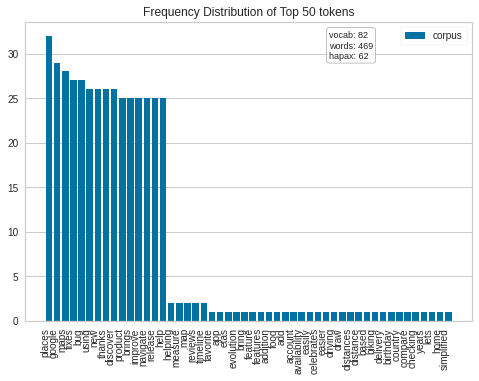

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(googleMaps_comments)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

In [ ]:
unique_googleMaps_comments = list(set(googleMaps_comments))
len(unique_googleMaps_comments)
for i in range(10):
    print(unique_googleMaps_comments[i])

Thanks for using Google Maps! This release brings bug fixes that improve our product to help you discover new places and navigate to them. 
Thanks for using Google Maps! This release brings bug fixes that improve our product to help you discover new places and navigate to them.
 Upload photos along with your reviews of places
Thanks for using Google Maps!
 Bug fixes
Google Maps turns 15 years old! See the new Google Maps icon, which celebrates the app’s evolution from helping you get to places to also helping you discover the world. This birthday update includes a simplified home screen that makes it easier to find your favorite features, including your saved places, reviews, and lists. Tap your Google Account profile picture to see settings, Location Sharing, Timeline, and more.
 Order from food delivery services (limited availability based on country)
Thanks for using Google Maps! This release brings the “Measure distance” feature that lets you draw a route and measure distances betw

In [ ]:
# googleMaps_data.to_csv("googleMaps_data.csv")

##Scrape Google Translate Data

In [ ]:
def googleTranslateData(main_url, num_of_sites):
    urls = []
    version_name = []
    version_date = []
    version_comments = []
    all_comments = []
    for i in range(1, num_of_sites+1):
        url = main_url + str(i) + '/'
        urls.append(url)
    for i in range(num_of_sites):
        response = requests.get(urls[i])
        print("Website:", i+1, "Response:", response)
        soup = BeautifulSoup(response.content, 'html.parser')
        version_data = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        data_lst = []
        for i in version_data:
            if(i.a != None):
                data_lst.append(i.a.text)
                version_name.append(i.a.text)
        a = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        a = np.array(a)
        z = [str(i) for i in a]
        dates = []
        for i in z:
            x = i[i.find('(')+1:i.find(')')]
            if(x[0] == 'U'):
                dates.append(x)
                version_date.append(x)
        LL = []
        com = soup.find_all('ul', attrs = {'class': 'changes'})
        for j in com:
            L = []
            text = list(j.descendants)
            for i in range(2, len(text), 3):
                L.append(text[i])
                all_comments.append(text[i])
            LL.append(L)
            version_comments.append(L)
        val = len(data_lst)-len(LL)
        for i in range(val):
            version_comments.append("-")
    print(len(version_name))
    print(len(version_date))
    print(len(version_comments))
    df = pd.DataFrame({'version_name': version_name, 'version_date': version_date, 'version_bugs_fixes': version_comments})
    return df, all_comments

In [ ]:
googleTranslate_data, googleTranslate_comments = googleTranslateData("https://www.ipa4fun.com/history/343/", 4)

Website: 1 Response: <Response [200]>
Website: 2 Response: <Response [200]>
Website: 3 Response: <Response [200]>
Website: 4 Response: <Response [200]>
80
80
80


In [ ]:
googleTranslate_data.shape

(80, 3)

In [ ]:
print("- Before removing the duplicates from df:",googleTranslate_data.shape)

# Removing the list brackets from bug fixes statements.
googleTranslate_data['version_bugs_fixes'] = googleTranslate_data['version_bugs_fixes'].str[0]

# Removing the duplicates from the dataframe.
googleTranslate_data = googleTranslate_data.drop_duplicates()

# Updating the date format.
def updateDate(x):
	return x.replace("Updated: ","")
googleTranslate_data['version_date'] = googleTranslate_data['version_date'].apply(updateDate)

print("- After removing the duplicates from df:",googleTranslate_data.shape)

# Blank Line
print("")
googleTranslate_data

- Before removing the duplicates from df: (80, 3)
- After removing the duplicates from df: (77, 3)



,version_name,version_date,version_bugs_fixes
0,Google Translate 6.34.0,"April 18, 2022",• Several bug fixes and usability improvements
1,Google Translate 6.33.0,"April 4, 2022",• Several bug fixes and usability improvements
2,Google Translate 6.32.0,"March 22, 2022",• Several bug fixes and usability improvements
3,Google Translate 6.31.0,"March 6, 2022",• Includes a new Widget to keep helpful transl...
4,Google Translate 6.30.0,"February 16, 2022",• Several bug fixes and usability improvements
...,...,...,...
75,Google Translate 4.0.0,"July 29, 2015",-
76,Google Translate 3.3.0,"March 19, 2015",-
77,Google Translate 3.2.0,"February 19, 2015",-
78,Google Translate 3.1.0,"January 14, 2015",-


In [ ]:
googleTranslate_comments = googleTranslate_data['version_bugs_fixes'].tolist()
print("Before removing the '-' element from the list:",len(googleTranslate_comments))

Before removing the '-' element from the list: 77


In [ ]:
# Removing the random words from the dataset/dataframe.
L = ['Apple', 'IOS', 'ios', 'apple', 'IOS', 'Iphone', 'iphone', '-']
for i in googleTranslate_comments:
    if(any(email_service in i for email_service in L)):
        googleTranslate_comments.remove(i)
print("After removing the '-' element from the list:",len(googleTranslate_comments))

After removing the '-' element from the list: 17


In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(googleTranslate_comments)
vectorizer.get_feature_names_out()

array(['access', 'appearance', 'audio', 'bug', 'camera', 'chinese',
       'dark', 'deliver', 'devices', 'downloads', 'english', 'feedback',
       'fixed', 'fixes', 'helpful', 'home', 'improved', 'improvements',
       'includes', 'incorporated', 'instant', 'issue', 'issues',
       'japanese', 'language', 'log', 'mode', 'new', 'offline',
       'phrasebook', 'related', 'screen', 'speaking', 'thanks', 'tools',
       'translated', 'translation', 'translations', 'upgraded',
       'usability', 'user', 've', 'widget'], dtype=object)

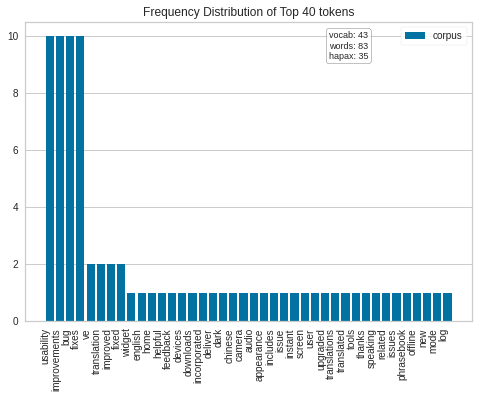

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(googleTranslate_comments)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', n = 40)
visualizer.fit(docs)
visualizer.show()

In [ ]:
unique_googleTranslate_comments = list(set(googleTranslate_comments))
len(unique_googleTranslate_comments)
for i in range(8):
    print(unique_googleTranslate_comments[i])

Instant camera translation: English to/from Japanese
• Several bug fixes and usability improvements
• Includes a new Widget to keep helpful translation tools on your Home Screen
• Now you can log in and access your phrasebook across all of your devices
• We've incorporated user feedback to deliver an improved appearance in Dark Mode.
Fixed the issue that sometimes Chinese can not be translated
Improved offline translations with upgraded language downloads
Thanks for speaking up!  We've fixed several audio related issues.


In [ ]:
# googleTranslate_data.to_csv("googleTranslate_data.csv")

##Scrape Microsoft Lens Data

In [ ]:
def microsoftLensData(main_url, num_of_sites):
    urls = []
    version_name = []
    version_date = []
    version_comments = []
    all_comments = []
    for i in range(1, num_of_sites+1):
        url = main_url + str(i) + '/'
        urls.append(url)
    for i in range(num_of_sites):
        response = requests.get(urls[i])
        print("Website:", i+1, "Response:", response)
        soup = BeautifulSoup(response.content, 'html.parser')
        version_data = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        data_lst = []
        for i in version_data:
            if(i.a != None):
                data_lst.append(i.a.text)
                version_name.append(i.a.text)
        a = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        a = np.array(a)
        z = [str(i) for i in a]
        dates = []
        for i in z:
            x = i[i.find('(')+1:i.find(')')]
            if(x[0] == 'U'):
                dates.append(x)
                version_date.append(x)
        LL = []
        com = soup.find_all('ul', attrs = {'class': 'changes'})
        for j in com:
            L = []
            text = list(j.descendants)
            for i in range(2, len(text), 3):
                L.append(text[i])
                all_comments.append(text[i])
            LL.append(L)
            version_comments.append(L)
        val = len(data_lst)-len(LL)
        for i in range(val):
            version_comments.append("-")
    print(len(version_name))
    print(len(version_date))
    print(len(version_comments))
    df = pd.DataFrame({'version_name': version_name, 'version_date': version_date, 'version_bugs_fixes': version_comments})
    return df, all_comments

In [ ]:
microsoftLens_data, microsoftLens_comments = microsoftLensData("https://www.ipa4fun.com/history/21686/", 4)

Website: 1 Response: <Response [200]>
Website: 2 Response: <Response [200]>
Website: 3 Response: <Response [200]>
Website: 4 Response: <Response [200]>
77
77
77


In [ ]:
microsoftLens_data.shape

(77, 3)

In [ ]:
print("- Before removing the duplicates from df:",microsoftLens_data.shape)

# Removing the list brackets from bug fixes statements.
microsoftLens_data['version_bugs_fixes'] = microsoftLens_data['version_bugs_fixes'].str[0]

# Removing the duplicates from the dataframe.
microsoftLens_data = microsoftLens_data.drop_duplicates()

# Updating the date format.
def updateDate(x):
	return x.replace("Updated: ","")
microsoftLens_data['version_date'] = microsoftLens_data['version_date'].apply(updateDate)

print("- After removing the duplicates from df:",microsoftLens_data.shape)

# Blank Line
print("")
microsoftLens_data

- Before removing the duplicates from df: (77, 3)
- After removing the duplicates from df: (74, 3)



,version_name,version_date,version_bugs_fixes
0,Microsoft Lens 2.59.4,"March 25, 2022",Bug fixes and performance improvements
1,Microsoft Lens 2.59.3,"March 15, 2022",Bug fixes and performance improvements
2,Microsoft Lens 2.57.2,"February 1, 2022",Bug fixes and performance improvements
3,Microsoft Lens 2.56.1,"December 28, 2021",Bug fixes and performance improvements
4,Microsoft Lens 2.56,"December 12, 2021",Bug fixes and performance improvements
...,...,...,...
72,Office Lens 1.2.2,"October 29, 2015",-
73,Office Lens 1.2.1,"October 26, 2015",-
74,Office Lens 1.1,"August 26, 2015",-
75,Office Lens 1.0.1,"April 7, 2015",-


In [ ]:
microsoftLens_comments = microsoftLens_data['version_bugs_fixes'].tolist()
print("Before removing the '-' element from the list:",len(microsoftLens_comments))

Before removing the '-' element from the list: 74


In [ ]:
# Removing the random words from the dataset/dataframe.
L = ['Apple', 'IOS', 'ios', 'apple', 'IOS', 'Iphone', 'iphone', '-']
for i in microsoftLens_comments:
    if(any(email_service in i for email_service in L)):
        microsoftLens_comments.remove(i)
print("After removing the '-' element from the list:",len(microsoftLens_comments))

After removing the '-' element from the list: 17


In [ ]:
microsoftLens_comments

['Bug fixes and performance improvements',
 'Bug fixes and performance improvements',
 'Bug fixes and performance improvements',
 'Bug fixes and performance improvements',
 'Bug fixes and performance improvements',
 'Bug fixes and Performance improvements',
 'Bug fixes and Performance improvements',
 'Bug fixes and Performance improvements',
 'Bug fixes and performance improvements',
 'Bug fixes and Performance improvements',
 'Bug fixes and performance improvements',
 'Bug fixes and performance improvements',
 'Bug fixes & performance improvements',
 'Bug fixes',
 'Office Lens is now available for your iPad, and you’re going to love the way it looks on a bigger screen!',
 'Bug fixes',
 'Bug fixes']

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(microsoftLens_comments)
vectorizer.get_feature_names_out()

array(['available', 'bigger', 'bug', 'fixes', 'going', 'improvements',
       'ipad', 'lens', 'looks', 'love', 'office', 'performance', 'screen',
       'way'], dtype=object)

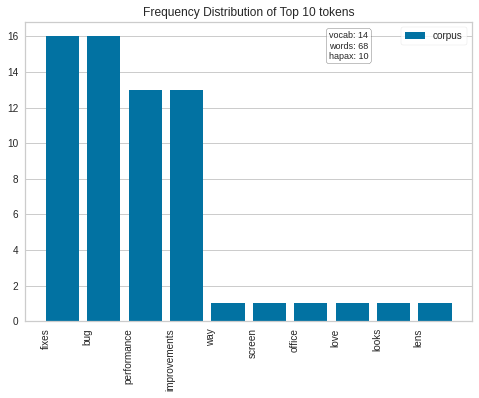

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(microsoftLens_comments)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', n = 10)
visualizer.fit(docs)
visualizer.show()

In [ ]:
unique_microsoftLens_comments = list(set(microsoftLens_comments))
len(unique_microsoftLens_comments)
for i in range(4):
    print(unique_microsoftLens_comments[i])

Bug fixes & performance improvements
Bug fixes and Performance improvements
Bug fixes
Bug fixes and performance improvements


In [ ]:
# microsoftLens_data.to_csv("microsoftLens_data.csv")

##Scrape Truecaller Data

In [ ]:
def truecallerData(main_url, num_of_sites):
    urls = []
    version_name = []
    version_date = []
    version_comments = []
    all_comments = []
    for i in range(1, num_of_sites+1):
        url = main_url + str(i) + '/'
        urls.append(url)
    for i in range(num_of_sites):
        response = requests.get(urls[i])
        print("Website:", i+1, "Response:", response)
        soup = BeautifulSoup(response.content, 'html.parser')
        version_data = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        data_lst = []
        for i in version_data:
            if(i.a != None):
                data_lst.append(i.a.text)
                version_name.append(i.a.text)
        a = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        a = np.array(a)
        z = [str(i) for i in a]
        dates = []
        for i in z:
            x = i[i.find('(')+1:i.find(')')]
            if(x[0] == 'U'):
                dates.append(x)
                version_date.append(x)
        LL = []
        com = soup.find_all('ul', attrs = {'class': 'changes'})
        for j in com:
            L = []
            text = list(j.descendants)
            for i in range(2, len(text), 3):
                L.append(text[i])
                all_comments.append(text[i])
            LL.append(L)
            version_comments.append(L)
        val = len(data_lst)-len(LL)
        for i in range(val):
            version_comments.append("-")
    print(len(version_name))
    print(len(version_date))
    print(len(version_comments))
    df = pd.DataFrame({'version_name': version_name, 'version_date': version_date, 'version_bugs_fixes': version_comments})
    return df, all_comments

In [ ]:
truecaller_data, truecaller_comments = truecallerData("https://www.ipa4fun.com/history/22656/", 7)

Website: 1 Response: <Response [200]>
Website: 2 Response: <Response [200]>
Website: 3 Response: <Response [200]>
Website: 4 Response: <Response [200]>
Website: 5 Response: <Response [200]>
Website: 6 Response: <Response [200]>
Website: 7 Response: <Response [200]>
135
135
135


In [ ]:
truecaller_data.shape

(135, 3)

In [ ]:
print("- Before removing the duplicates from df:",truecaller_data.shape)

# Removing the list brackets from bug fixes statements.
truecaller_data['version_bugs_fixes'] = truecaller_data['version_bugs_fixes'].str[0]

# Removing the duplicates from the dataframe.
truecaller_data = truecaller_data.drop_duplicates()

# Updating the date format.
def updateDate(x):
	return x.replace("Updated: ","")
truecaller_data['version_date'] = truecaller_data['version_date'].apply(updateDate)

print("- After removing the duplicates from df:",truecaller_data.shape)

# Blank Line
print("")
truecaller_data

- Before removing the duplicates from df: (135, 3)
- After removing the duplicates from df: (129, 3)



,version_name,version_date,version_bugs_fixes
0,Truecaller 11.53,"April 29, 2022",Hello!
1,Truecaller 11.51.6,"April 11, 2022",Hello!
2,Truecaller 11.51,"April 8, 2022",Hello!
3,Truecaller 11.50,"March 8, 2022",Hello!
4,Truecaller 11.49,"February 23, 2022",Hello!
...,...,...,...
130,Truecaller 5.40,"June 16, 2015",-
131,Truecaller 5.31,"June 5, 2015",-
132,Truecaller 5.30,"May 25, 2015",-
133,Truecaller 5.20,"April 20, 2015",-


In [ ]:
truecaller_comments = truecaller_data['version_bugs_fixes'].tolist()
print("Before removing the '-' element from the list:",len(truecaller_comments))

Before removing the '-' element from the list: 129


In [ ]:
# Removing the random words from the dataset/dataframe.
L = ['Apple', 'IOS', 'ios', 'apple', 'IOS', 'Iphone', 'iphone', '-']
for i in truecaller_comments:
    if(any(email_service in i for email_service in L)):
        truecaller_comments.remove(i)
print("After removing the '-' element from the list:",len(truecaller_comments))

After removing the '-' element from the list: 26


In [ ]:
truecaller_comments

['Hello!',
 'Hello!',
 'Hello!',
 'Hello!',
 'Hello!',
 "Fixed: Truecaller will no longer prompt you to enable spam call identification when it's already turned on.",
 "Hello! We've made major improvements to spam call detection in this version. Be sure to turn on Truecaller Caller Identification from iPhone Settings > Phone > Caller Identification",
 'Major improvements to spam call detection (Remember to enable from iPhone settings > Phone > Caller Identification and Block > Truecaller).',
 'Major improvements to spam call detection (Remember to enable from iPhone settings > Phone > Caller Identification and Block > Truecaller).',
 'Major improvements to spam call detection (Remember to enable from iPhone settings > Phone > Caller Identification and Block > Truecaller).',
 'Introducing Group Chats!',
 '* Introducing Truecaller Voice! High quality voice calls with anyone on Truecaller using data/WiFi.',
 'Introducing Truecaller Voice! High quality voice calls with anyone on Truecaller

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(truecaller_comments)
vectorizer.get_feature_names_out()

array(['42', 'added', 'addition', 'annoying', 'block', 'bug', 'caller',
       'calling', 'calls', 'case', 'chat', 'chats', 'codes',
       'congratulations', 'contact', 'country', 'data', 'detection',
       'displayed', 'duo', 'enable', 'explore', 'feedback', 'fixed',
       'fixes', 'good', 'google', 'got', 'group', 'hear', 'hello', 'high',
       'hints', 'identification', 'improvements', 'introducing', 'ios',
       'ios11', 'iphone', 'items', 'junk', 'know', 'left', 'like',
       'lindsey', 'log', 'login', 'longer', 'love', 'major', 'manager',
       'media', 'million', 'multiple', 'numbers', 'oh', 'ones', 'page',
       'performance', 'phone', 'profile', 'prompt', 'protect', 'quality',
       'reach', 'remember', 'review', 'screen', 'search', 'send',
       'settings', 'sms', 'social', 'spam', 'speaking', 'sure',
       'thoughts', 'tips', 'truecaller', 'turn', 'turned', 'twitter',
       'update', 'using', 've', 'version', 'video', 'voice', 'wifi'],
      dtype=object)

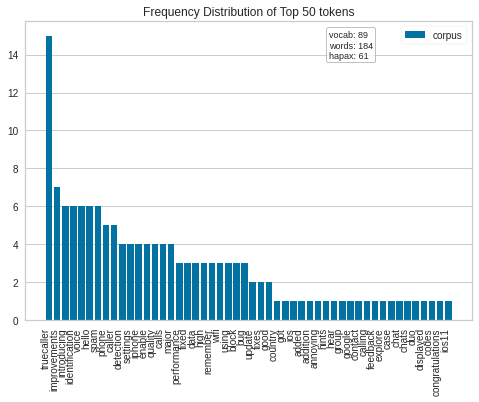

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(truecaller_comments)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

In [ ]:
unique_truecaller_comments = list(set(truecaller_comments))
len(unique_truecaller_comments)
for i in range(3,10):
    print(unique_truecaller_comments[i])

Introducing Truecaller Voice! High quality voice calls with anyone on Truecaller using data/WiFi.
Fixed country codes bug on login page
Performance and quality improvements
Hello!
Introducing Group Chats!
Explore Truecaller tips and hints in My Profile screen!
* Introducing Truecaller Voice! High quality voice calls with anyone on Truecaller using data/WiFi.


In [ ]:
# truecaller_data.to_csv("truecaller_data.csv")

##Scrape Xender Data

In [ ]:
def xenderData(main_url, num_of_sites):
    urls = []
    version_name = []
    version_date = []
    version_comments = []
    all_comments = []
    for i in range(1, num_of_sites+1):
        url = main_url + str(i) + '/'
        urls.append(url)
    for i in range(num_of_sites):
        response = requests.get(urls[i])
        print("Website:", i+1, "Response:", response)
        soup = BeautifulSoup(response.content, 'html.parser')
        version_data = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        data_lst = []
        for i in version_data:
            if(i.a != None):
                data_lst.append(i.a.text)
                version_name.append(i.a.text)
        a = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        a = np.array(a)
        z = [str(i) for i in a]
        dates = []
        for i in z:
            x = i[i.find('(')+1:i.find(')')]
            if(x[0] == 'U'):
                dates.append(x)
                version_date.append(x)
        LL = []
        com = soup.find_all('ul', attrs = {'class': 'changes'})
        for j in com:
            L = []
            text = list(j.descendants)
            for i in range(2, len(text), 3):
                L.append(text[i])
                all_comments.append(text[i])
            LL.append(L)
            version_comments.append(L)
        val = len(data_lst)-len(LL)
        for i in range(val):
            version_comments.append("-")
    print(len(version_name))
    print(len(version_date))
    print(len(version_comments))
    df = pd.DataFrame({'version_name': version_name, 'version_date': version_date, 'version_bugs_fixes': version_comments})
    return df, all_comments

In [ ]:
xender_data, xender_comments = xenderData("https://www.ipa4fun.com/history/218493/", 2)

Website: 1 Response: <Response [200]>
Website: 2 Response: <Response [200]>
38
38
38


In [ ]:
xender_data.shape

(38, 3)

In [ ]:
print("- Before removing the duplicates from df:",xender_data.shape)

# Removing the list brackets from bug fixes statements.
xender_data['version_bugs_fixes'] = xender_data['version_bugs_fixes'].str[0]

# Removing the duplicates from the dataframe.
xender_data = xender_data.drop_duplicates()

# Updating the date format.
def updateDate(x):
	return x.replace("Updated: ","")
xender_data['version_date'] = xender_data['version_date'].apply(updateDate)

print("- After removing the duplicates from df:",xender_data.shape)

# Blank Line
print("")
xender_data

- Before removing the duplicates from df: (38, 3)
- After removing the duplicates from df: (37, 3)



,version_name,version_date,version_bugs_fixes
0,Xender 5.3.2,"April 19, 2022",1.Fixed some bugs.
1,Xender 5.3.1,"January 1, 2022",1. Solve crash problem when deleting audios.
2,Xender 5.3,"December 19, 2021",1. Fix the occasional search crash problem.
3,Xender 5.2,"October 26, 2021",1.Fix some bugs.
4,Xender 5.1,"August 20, 2021",1.Fix some bugs.
5,Xender 5.0,"May 2, 2021",-
6,Xender 4.9.9,"April 1, 2021",-
7,Xender 4.9.8,"January 9, 2021",-
8,Xender 4.9.7,"December 8, 2020",-
9,Xender 4.9.6,"October 13, 2020",-


In [ ]:
xender_comments = xender_data['version_bugs_fixes'].tolist()
print("Before removing the '-' element from the list:",len(xender_comments))

Before removing the '-' element from the list: 37


In [ ]:
# Removing the random words from the dataset/dataframe.
L = ['Apple', 'IOS', 'ios', 'apple', 'IOS', 'Iphone', 'iphone', '-']
for i in xender_comments:
    if(any(email_service in i for email_service in L)):
        xender_comments.remove(i)
print("After removing the '-' element from the list:",len(xender_comments))

After removing the '-' element from the list: 8


In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(xender_comments)
vectorizer.get_feature_names_out()

array(['added', 'audio', 'browser', 'bug', 'bugs', 'computer',
       'connected', 'crash', 'disappears', 'extracting', 'fix', 'fixed',
       'formats', 'function', 'mobile', 'mov', 'mp4', 'occasional',
       'occasionally', 'pc', 'phone', 'pictures', 'problem', 'search',
       'solve', 'supporting', 'transfer', 'usage', 'video'], dtype=object)

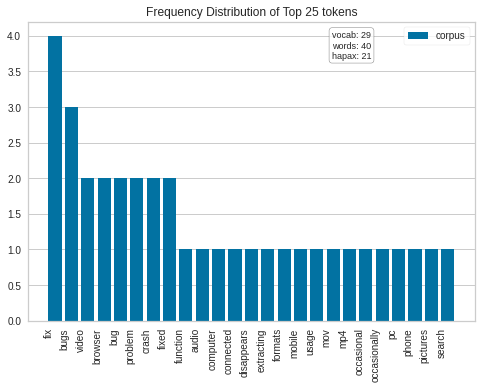

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(xender_comments)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', n=25)
visualizer.fit(docs)
visualizer.show()

In [ ]:
unique_xender_comments = list(set(xender_comments))
len(unique_xender_comments)
for i in range(7):
    print(unique_xender_comments[i])

1. Added the function of extracting audio from video, supporting .mp4, .mov and other video formats.
1. Fix the bug that the browser disappears occasionally.
1. Fixed the problem that the PC cannot transfer pictures to the mobile phone when connected to the computer.
1. Fix the occasional search crash problem.
1.Fix some bugs.
1.Solve the crash bug during browser usage.
1.Fixed some bugs.


In [ ]:
# xender_data.to_csv("xender_data.csv")

#Finance/Banking Apps

##Scrape Paypal Data

In [ ]:
def paypalData(main_url, num_of_sites):
    urls = []
    version_name = []
    version_date = []
    version_comments = []
    all_comments = []
    for i in range(1, num_of_sites+1):
        url = main_url + str(i) + '/'
        urls.append(url)
    for i in range(num_of_sites):
        response = requests.get(urls[i])
        print("Website:", i+1, "Response:", response)
        soup = BeautifulSoup(response.content, 'html.parser')
        version_data = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        data_lst = []
        for i in version_data:
            if(i.a != None):
                data_lst.append(i.a.text)
                version_name.append(i.a.text)
        a = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        a = np.array(a)
        z = [str(i) for i in a]
        dates = []
        for i in z:
            x = i[i.find('(')+1:i.find(')')]
            if(x[0] == 'U' and x[1] != 'S'):
                dates.append(x)
                version_date.append(x)
        LL = []
        com = soup.find_all('ul', attrs = {'class': 'changes'})
        for j in com:
            L = []
            text = list(j.descendants)
            for i in range(2, len(text), 3):
                L.append(text[i])
                all_comments.append(text[i])
            LL.append(L)
            version_comments.append(L)
        val = len(data_lst)-len(LL)
        for i in range(val):
            version_comments.append("-")
    print(len(version_name))
    print(len(version_date))
    print(len(version_comments))
    df = pd.DataFrame({'version_name': version_name, 'version_date': version_date, 'version_bugs_fixes': version_comments})
    return df, all_comments

In [ ]:
paypal_data, paypal_comments = paypalData("https://www.ipa4fun.com/history/1015/", 9)

Website: 1 Response: <Response [200]>
Website: 2 Response: <Response [200]>
Website: 3 Response: <Response [200]>
Website: 4 Response: <Response [200]>
Website: 5 Response: <Response [200]>
Website: 6 Response: <Response [200]>
Website: 7 Response: <Response [200]>
Website: 8 Response: <Response [200]>
Website: 9 Response: <Response [200]>
184
184
184


In [ ]:
paypal_data.shape

(184, 3)

In [ ]:
print("- Before removing the duplicates from df:",paypal_data.shape)

# Removing the list brackets from bug fixes statements.
paypal_data['version_bugs_fixes'] = paypal_data['version_bugs_fixes'].str[0]

# Removing the duplicates from the dataframe.
paypal_data = paypal_data.drop_duplicates()

# Updating the date format.
def updateDate(x):
	return x.replace("Updated: ","")
paypal_data['version_date'] = paypal_data['version_date'].apply(updateDate)

print("- After removing the duplicates from df:",paypal_data.shape)

# Blank Line
print("")
paypal_data

- Before removing the duplicates from df: (184, 3)
- After removing the duplicates from df: (176, 3)



,version_name,version_date,version_bugs_fixes
0,PayPal 8.15.1,"April 21, 2022","Do more with PayPal, with more power packed in..."
1,PayPal 8.15.0,"April 18, 2022","Do more with PayPal, with more power packed in..."
2,PayPal 8.14.1,"April 8, 2022","Do more with PayPal, with more power packed in..."
3,PayPal 8.14.0,"April 4, 2022","Do more with PayPal, with more power packed in..."
4,PayPal 8.13.1,"March 29, 2022","Do more with PayPal, with more power packed in..."
...,...,...,...
179,PayPal 5.8.1,"October 13, 2014",-
180,PayPal 5.8,"October 6, 2014",-
181,PayPal 5.7,"September 23, 2014",-
182,PayPal 5.6.4,"August 26, 2014",-


In [ ]:
paypal_comments = paypal_data['version_bugs_fixes'].tolist()
print("Before removing the '-' element from the list:",len(paypal_comments))

Before removing the '-' element from the list: 176


In [ ]:
# Removing the random words from the dataset/dataframe.
L = ['Apple', 'IOS', 'ios', 'apple', 'IOS', 'Iphone', 'iphone', '-']
for i in paypal_comments:
    if(any(email_service in i for email_service in L)):
        paypal_comments.remove(i)
print("After removing the '-' element from the list:",len(paypal_comments))

After removing the '-' element from the list: 32


In [ ]:
paypal_comments

['Do more with PayPal, with more power packed into a single app. Shop the world with ease, send payments near and far, and much more. Find what matters to you and keep track of it more easily by downloading the latest version of the app.',
 'Do more with PayPal, with more power packed into a single app. Shop the world with ease, send payments near and far, and much more. Find what matters to you and keep track of it more easily by downloading the latest version of the app.',
 'Do more with PayPal, with more power packed into a single app. Shop the world with ease, send payments near and far, and much more. Find what matters to you and keep track of it more easily by downloading the latest version of the app.',
 'Do more with PayPal, with more power packed into a single app. Shop the world with ease, send payments near and far, and much more. Find what matters to you and keep track of it more easily by downloading the latest version of the app.',
 'Do more with PayPal, with more power p

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(paypal_comments)
vectorizer.get_feature_names_out()

array(['access', 'activity', 'app', 'automatic', 'balance', 'big',
       'bitcoin', 'bug', 'bugs', 'buy', 'checkout', 'code', 'codes',
       'creating', 'credit', 'crypto', 'cryptocurrencies', 'displayed',
       'downloading', 'ease', 'easier', 'easily', 'enjoy', 'face', 'far',
       'feedback', 'finances', 'fix', 'fixed', 'fixes', 'forgot',
       'frequently', 'got', 'greatest', 'happens', 'having', 'heard',
       'hold', 'home', 'hope', 'id', 'improvements', 'ios', 'iphone',
       'issues', 'language', 'latest', 'log', 'logged', 'making',
       'managing', 'matters', 'money', 'near', 'notifications', 'packed',
       'password', 'pay', 'payments', 'paypal', 'phone', 'power',
       'purchases', 'qr', 'revise', 'rewards', 'right', 'running', 'save',
       'screen', 'sell', 'selling', 'send', 'sending', 'shop', 'single',
       'smoothly', 'specific', 'speed', 'spending', 'stay', 'time',
       'touch', 'track', 'transactions', 'type', 'updated', 'updates',
       'use', 'usin

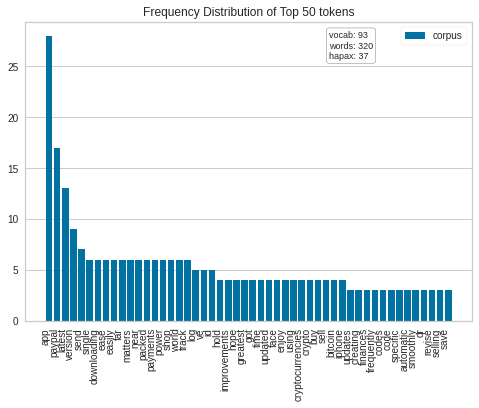

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(paypal_comments)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

In [ ]:
unique_paypal_comments = list(set(paypal_comments))
len(unique_paypal_comments)
for i in range(10):
    print(unique_paypal_comments[i])

We hope you enjoy our app!  Please keep it updated so you’ve always got our latest and greatest improvements.
You can now access your rewards from the home screen.
Selling with a QR code? Save some time by creating codes with specific amount
Crypto – You can now buy, hold and sell Bitcoin and other cryptocurrencies in the PayPal app (US Only)
Selling with a QR code? Save some time by creating codes with specific amount.
We hope you enjoy our app! Keep it updated so you've always got the latest and greatest.
Fix for language issues on iOS 9
Bug Fixes
We hope you enjoy our app! Keep it updated so you've always got the latest and greatest. We hope you enjoy our app! Keep it updated so you've always got the latest and greatest.
Use your phone’s Touch ID to log into the PayPal app.


In [ ]:
# paypal_data.to_csv("paypal_data.csv")

##Scrape Amex Bank Data

In [ ]:
def amexData(main_url, num_of_sites):
    urls = []
    version_name = []
    version_date = []
    version_comments = []
    all_comments = []
    for i in range(1, num_of_sites+1):
        url = main_url + str(i) + '/'
        urls.append(url)
    for i in range(num_of_sites):
        response = requests.get(urls[i])
        print("Website:", i+1, "Response:", response)
        soup = BeautifulSoup(response.content, 'html.parser')
        version_data = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        data_lst = []
        for i in version_data:
            if(i.a != None):
                data_lst.append(i.a.text)
                version_name.append(i.a.text)
        a = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        a = np.array(a)
        z = [str(i) for i in a]
        dates = []
        for i in z:
            x = i[i.find('(')+1:i.find(')')]
            if(x[0] == 'U'):
                dates.append(x)
                version_date.append(x)
        LL = []
        com = soup.find_all('ul', attrs = {'class': 'changes'})
        for j in com:
            L = []
            text = list(j.descendants)
            for i in range(2, len(text), 3):
                L.append(text[i])
                all_comments.append(text[i])
            LL.append(L)
            version_comments.append(L)
        val = len(data_lst)-len(LL)
        for i in range(val):
            version_comments.append("-")
    print(len(version_name))
    print(len(version_date))
    print(len(version_comments))
    df = pd.DataFrame({'version_name': version_name, 'version_date': version_date, 'version_bugs_fixes': version_comments})
    return df, all_comments

In [ ]:
amex_data, amex_comments = amexData("https://www.ipa4fun.com/history/838/", 6)

Website: 1 Response: <Response [200]>
Website: 2 Response: <Response [200]>
Website: 3 Response: <Response [200]>
Website: 4 Response: <Response [200]>
Website: 5 Response: <Response [200]>
Website: 6 Response: <Response [200]>
113
113
113


In [ ]:
amex_data.shape

(113, 3)

In [ ]:
print("- Before removing the duplicates from df:",amex_data.shape)

# Removing the list brackets from bug fixes statements.
amex_data['version_bugs_fixes'] = amex_data['version_bugs_fixes'].str[0]

# Removing the duplicates from the dataframe.
amex_data = amex_data.drop_duplicates()

# Updating the date format.
def updateDate(x):
	return x.replace("Updated: ","")
amex_data['version_date'] = amex_data['version_date'].apply(updateDate)

print("- After removing the duplicates from df:",amex_data.shape)

# Blank Line
print("")
amex_data

- Before removing the duplicates from df: (113, 3)
- After removing the duplicates from df: (108, 3)



,version_name,version_date,version_bugs_fixes
0,Amex 6.53.0,"April 28, 2022",Bug fixes and enhancements.
1,Amex 6.52.0,"March 31, 2022",We removed the Statements tab from the bottom ...
2,Amex 6.51.0,"February 22, 2022",-We simplified how merchant names appear on th...
3,Amex 6.50.0,"January 31, 2022",Bug fixes and enhancements.
4,Amex 6.49.0,"January 10, 2022",Bug fixes and enhancements.
...,...,...,...
108,Amex Mobile 4.6.4,"December 2, 2014",•Enjoy quicker access to your account with Tou...
109,Amex Mobile 4.6.3,"October 20, 2014",-
110,Amex Mobile 4.6.2,"October 16, 2014",-
111,Amex Mobile 4.6.1,"September 9, 2014",-


In [ ]:
amex_comments = amex_data['version_bugs_fixes'].tolist()
print("Before removing the '-' element from the list:",len(amex_comments))

Before removing the '-' element from the list: 108


In [ ]:
# Removing the random words from the dataset/dataframe.
L = ['Apple', 'IOS', 'ios', 'apple', 'IOS', 'Iphone', 'iphone', '-']
for i in amex_comments:
    if(any(email_service in i for email_service in L)):
        amex_comments.remove(i)
print("After removing the '-' element from the list:",len(amex_comments))

After removing the '-' element from the list: 23


In [ ]:
amex_comments

['Bug fixes and enhancements.',
 'We removed the Statements tab from the bottom of your screen.  You can now find your Statements in the Home tab.',
 'Bug fixes and enhancements.',
 'Bug fixes and enhancements.',
 '• Bug fixes and enhancements',
 'Card Members can now:',
 '• Digital receipts are now available through our app for specific merchants such as, Microsoft, Skype and more!',
 'Bug fixes and minor enhancements.',
 'Find nearby Amex Offers using the enhanced map and view your added Offers.',
 'Find nearby Amex Offers using the enhanced map and view your added Offers.',
 'Bug fixes and minor enhancements.',
 'Bug fixes and minor enhancements.',
 'Enhanced design, navigation and user experience',
 'Enhanced design, navigation and user experience',
 'Enhanced design, navigation and user experience',
 'Bug fixes and minor enhancements.',
 'For Membership Rewards® enrolled Cards: we’ve improved the user experience so you can use points for gift cards and access your mobile gift card

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(amex_comments)
vectorizer.get_feature_names_out()

array(['access', 'account', 'activity', 'added', 'additional', 'amex',
       'app', 'available', 'balances', 'billing', 'bug', 'card', 'cards',
       'current', 'design', 'devices', 'digital', 'easier', 'enhanced',
       'enhancements', 'enjoy', 'enrolled', 'experience', 'fixes', 'gift',
       'got', 'home', 'id', 'improved', 'includes', 'information', 'ios',
       'just', 'make', 'map', 'members', 'membership', 'merchants',
       'microsoft', 'minor', 'mobile', 'navigation', 'nearby', 'offers',
       'points', 'quicker', 'receipts', 'removed', 'rewards', 'right',
       'screen', 'skype', 'specific', 'statements', 'status', 'staying',
       'supported', 'tab', 'touch', 'understand', 'use', 'user', 'using',
       've', 'view', 'wallet'], dtype=object)

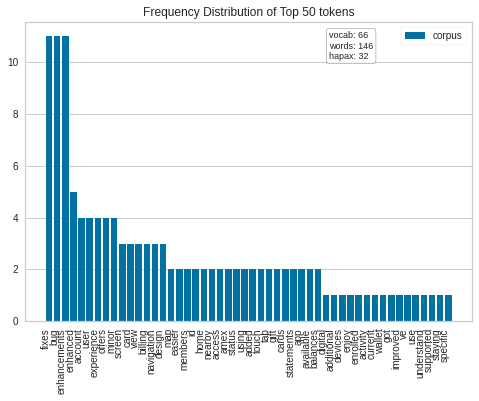

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(amex_comments)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

In [ ]:
unique_amex_comments = list(set(amex_comments))
len(unique_amex_comments)
for i in range(10):
    print(unique_amex_comments[i])

• Digital receipts are now available through our app for specific merchants such as, Microsoft, Skype and more!
For Membership Rewards® enrolled Cards: we’ve improved the user experience so you can use points for gift cards and access your mobile gift card wallet within the app.
We removed the Statements tab from the bottom of your screen.  You can now find your Statements in the Home tab.
For Additional Card Members: The Billing screen now includes more information to make it easier to understand your account balances and current billing status.
Bug fixes and enhancements.
• Bug fixes and enhancements
Find nearby Amex Offers using the enhanced map and view your added Offers.
Bug fixes and enhancements for Touch ID.
Enhanced design, navigation and user experience
Staying on top of your account just got easier. You can now view your billing status, account balances, and activity right from the Home screen.


In [ ]:
# amex_data.to_csv("amex_data.csv")

##Scrape Blockchain.com Data

In [ ]:
def blockchainData(main_url, num_of_sites):
    urls = []
    version_name = []
    version_date = []
    version_comments = []
    all_comments = []
    for i in range(1, num_of_sites+1):
        url = main_url + str(i) + '/'
        urls.append(url)
    for i in range(num_of_sites):
        response = requests.get(urls[i])
        print("Website:", i+1, "Response:", response)
        soup = BeautifulSoup(response.content, 'html.parser')
        version_data = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        data_lst = []
        for i in version_data:
            if(i.a != None):
                data_lst.append(i.a.text)
                version_name.append(i.a.text)
        a = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        a = np.array(a)
        z = [str(i) for i in a]
        dates = []
        for i in z:
            x = i[i.find('(')+1:i.find(')')]
            if(x[0] == 'U' and x[1] != 'S'):
                dates.append(x)
                version_date.append(x)
        LL = []
        com = soup.find_all('ul', attrs = {'class': 'changes'})
        for j in com:
            L = []
            text = list(j.descendants)
            for i in range(2, len(text), 3):
                L.append(text[i])
                all_comments.append(text[i])
            LL.append(L)
            version_comments.append(L)
        val = len(data_lst)-len(LL)
        for i in range(val):
            version_comments.append("-")
    print(len(version_name))
    print(len(version_date))
    print(len(version_comments))
    df = pd.DataFrame({'version_name': version_name, 'version_date': version_date, 'version_bugs_fixes': version_comments})
    return df, all_comments

In [ ]:
blockchain_data, blockchain_comments = blockchainData("https://www.ipa4fun.com/history/277353/", 7)

Website: 1 Response: <Response [200]>
Website: 2 Response: <Response [200]>
Website: 3 Response: <Response [200]>
Website: 4 Response: <Response [200]>
Website: 5 Response: <Response [200]>
Website: 6 Response: <Response [200]>
Website: 7 Response: <Response [200]>
129
129
129


In [ ]:
blockchain_data.shape

(129, 3)

In [ ]:
print("- Before removing the duplicates from df:",blockchain_data.shape)

# Removing the list brackets from bug fixes statements.
blockchain_data['version_bugs_fixes'] = blockchain_data['version_bugs_fixes'].str[0]

# Removing the duplicates from the dataframe.
blockchain_data = blockchain_data.drop_duplicates()

# Updating the date format.
def updateDate(x):
	return x.replace("Updated: ","")
blockchain_data['version_date'] = blockchain_data['version_date'].apply(updateDate)

print("- After removing the duplicates from df:",blockchain_data.shape)

# Blank Line
print("")
blockchain_data

- Before removing the duplicates from df: (129, 3)
- After removing the duplicates from df: (123, 3)



,version_name,version_date,version_bugs_fixes
0,Blockchain.com Wallet 202204.1.0,"April 19, 2022",Blockchain.com is the world's most popular way...
1,Blockchain.com Wallet 202203.2.0,"March 31, 2022",Blockchain.com is the world's most popular way...
2,Blockchain.com Wallet 202203.1.1,"March 23, 2022",Blockchain.com is the world's most popular way...
3,Blockchain.com Wallet 202203.1.0,"March 15, 2022",Blockchain.com is the world's most popular way...
4,Blockchain.com Wallet 202202.2.1,"March 10, 2022",Blockchain.com is the world's most popular way...
...,...,...,...
123,Blockchain Wallet 2.20.0,"November 24, 2019",-
124,Blockchain Wallet 2.19.1,"November 20, 2019",-
126,Blockchain Wallet 2.19.0,"November 14, 2019",Our latest crypto airdrop is almost here! Get ...
127,Blockchain Wallet 2.18.4,"November 7, 2019",In the latest update you’ll notice an option o...


In [ ]:
blockchain_comments = blockchain_data['version_bugs_fixes'].tolist()
print("Before removing the '-' element from the list:",len(blockchain_comments))

Before removing the '-' element from the list: 123


In [ ]:
# Removing the random words from the dataset/dataframe.
L = ['Apple', 'IOS', 'ios', 'apple', 'IOS', 'Iphone', 'iphone', '-']
for i in blockchain_comments:
    if(any(email_service in i for email_service in L)):
        blockchain_comments.remove(i)
print("After removing the '-' element from the list:",len(blockchain_comments))

After removing the '-' element from the list: 24


In [ ]:
blockchain_comments

["Blockchain.com is the world's most popular way to buy, sell, and trade crypto. In this release we improved your experience with the asset details screen and added BitPay support.",
 "Blockchain.com is the world's most popular way to buy, sell, and trade crypto. In this release, we resolved an issue with loading states that will improve your experience with all the transactions.",
 "Blockchain.com is the world's most popular way to buy, sell, and trade crypto. In this release, we resolved an issue with loading states that will improve your experience with all the transactions.",
 "Blockchain.com is the world's most popular way to buy, sell, and trade crypto. In this release, we have added the support of deep links and fixed a few bugs.",
 "Blockchain.com is the world's most popular way to buy, sell, and trade crypto. In this release, we have added the support of Apply Pay for crypto purchase, and a few other improvements related to payments and receive screen.",
 "Blockchain.com is th

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(blockchain_comments)
vectorizer.get_feature_names_out()

array(['aave', 'account', 'accounts', 'ach', 'activity', 'added',
       'addresses', 'airdrop', 'algorand', 'apply', 'asset', 'assets',
       'available', 'balance', 'balances', 'bank', 'bitpay', 'blockchain',
       'bug', 'bugs', 'buy', 'buying', 'causing', 'choose', 'com',
       'connect', 'contains', 'control', 'crypto', 'dashboard', 'deep',
       'deposit', 'details', 'displaying', 'easier', 'eur', 'exchange',
       'experience', 'faster', 'feature', 'finance', 'fixed', 'fixes',
       'flow', 'free', 'funds', 'getting', 'gives', 'gold', 'ibans',
       'improve', 'improved', 'improvements', 'improving', 'issue',
       'latest', 'lets', 'level', 'link', 'links', 'load', 'loading',
       'log', 'logging', 'making', 'new', 'number', 'option', 'pay',
       'payments', 'pit', 'polkadot', 'popular', 'purchase', 'receive',
       'related', 'release', 'resolved', 'rewards', 'screen', 'secure',
       'securely', 'selector', 'sell', 'send', 'showing', 'states',
       'stay', 'su

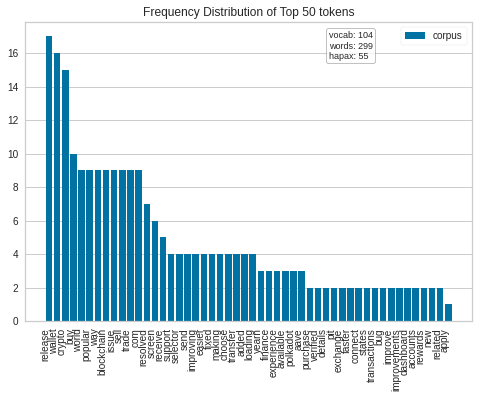

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(blockchain_comments)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

In [ ]:
unique_blockchain_comments = list(set(blockchain_comments))
len(unique_blockchain_comments)
for i in range(10):
    print(unique_blockchain_comments[i])

Blockchain.com is the world's most popular way to buy, sell, and trade crypto. In this release, we resolved an issue with loading states that will improve your experience with all the transactions.
Aave, Yearn Finance and Polkadot are now available on the Wallet!
We fixed an issue related to EUR deposit details not showing IBANs.
In this update we fixed an issue that was sometimes causing the balances not to show on your dashboard.
Blockchain.com is the world's most popular way to buy, sell, and trade crypto. In this release, we resolved an issue where some assets would not load.
Blockchain.com is the world's most popular way to buy, sell, and trade crypto. In this release, we resolved an issue displaying your Rewards Account balance on Dashboard.
We've made it faster than ever to log in to your Wallet.
Our latest crypto airdrop is almost here! Get Gold Level verified to secure your free crypto. Getting verified also gives you the option to connect your Wallet to our new crypto exchang

In [ ]:
# blockchain_data.to_csv("blockchain_data.csv")

##Scrape Coinbase Data

In [ ]:
def coinbaseData(main_url, num_of_sites):
    urls = []
    version_name = []
    version_date = []
    version_comments = []
    all_comments = []
    for i in range(1, num_of_sites+1):
        url = main_url + str(i) + '/'
        urls.append(url)
    for i in range(num_of_sites):
        response = requests.get(urls[i])
        print("Website:", i+1, "Response:", response)
        soup = BeautifulSoup(response.content, 'html.parser')
        version_data = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        data_lst = []
        for i in version_data:
            if(i.a != None):
                data_lst.append(i.a.text)
                version_name.append(i.a.text)
        a = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        a = np.array(a)
        z = [str(i) for i in a]
        dates = []
        for i in z:
            x = i[i.find('(')+1:i.find(')')]
            if(x[0] == 'U'):
                dates.append(x)
                version_date.append(x)
        LL = []
        com = soup.find_all('ul', attrs = {'class': 'changes'})
        for j in com:
            L = []
            text = list(j.descendants)
            for i in range(2, len(text), 3):
                L.append(text[i])
                all_comments.append(text[i])
            LL.append(L)
            version_comments.append(L)
        val = len(data_lst)-len(LL)
        for i in range(val):
            version_comments.append("-")
    print(len(version_name))
    print(len(version_date))
    print(len(version_comments))
    df = pd.DataFrame({'version_name': version_name, 'version_date': version_date, 'version_bugs_fixes': version_comments})
    return df, all_comments

In [ ]:
coinbase_data, coinbase_comments = coinbaseData("https://www.ipa4fun.com/history/132841/", 12)

Website: 1 Response: <Response [200]>
Website: 2 Response: <Response [200]>
Website: 3 Response: <Response [200]>
Website: 4 Response: <Response [200]>
Website: 5 Response: <Response [200]>
Website: 6 Response: <Response [200]>
Website: 7 Response: <Response [200]>
Website: 8 Response: <Response [200]>
Website: 9 Response: <Response [200]>
Website: 10 Response: <Response [200]>
Website: 11 Response: <Response [200]>
Website: 12 Response: <Response [200]>
249
249
249


In [ ]:
coinbase_data.shape

(249, 3)

In [ ]:
print("- Before removing the duplicates from df:",coinbase_data.shape)

# Removing the list brackets from bug fixes statements.
coinbase_data['version_bugs_fixes'] = coinbase_data['version_bugs_fixes'].str[0]

# Removing the duplicates from the dataframe.
coinbase_data = coinbase_data.drop_duplicates()

# Updating the date format.
def updateDate(x):
	return x.replace("Updated: ","")
coinbase_data['version_date'] = coinbase_data['version_date'].apply(updateDate)

print("- After removing the duplicates from df:",coinbase_data.shape)

# Blank Line
print("")
coinbase_data

- Before removing the duplicates from df: (249, 3)
- After removing the duplicates from df: (238, 3)



,version_name,version_date,version_bugs_fixes
0,Coinbase 10.14.12,"April 19, 2022",Coinbase is the easiest and most trusted place...
1,Coinbase 10.12.2,"April 16, 2022",Coinbase is the easiest and most trusted place...
2,Coinbase 10.12.1,"April 4, 2022",Coinbase is the easiest and most trusted place...
3,Coinbase 10.10.12,"March 21, 2022",Coinbase is the easiest and most trusted place...
4,Coinbase 10.9.12,"March 17, 2022",Coinbase is the easiest and most trusted place...
...,...,...,...
244,Coinbase 3.0.5,"November 7, 2017",-
245,Coinbase 3.0.4,"November 6, 2017",-
246,Coinbase 3.0.3,"October 26, 2017",-
247,Coinbase 3.0.2,"October 23, 2017",-


In [ ]:
coinbase_comments = coinbase_data['version_bugs_fixes'].tolist()
print("Before removing the '-' element from the list:",len(coinbase_comments))

Before removing the '-' element from the list: 238


In [ ]:
# Removing the random words from the dataset/dataframe.
L = ['Apple', 'IOS', 'ios', 'apple', 'IOS', 'Iphone', 'iphone', '-']
for i in coinbase_comments:
    if(any(email_service in i for email_service in L)):
        coinbase_comments.remove(i)
print("After removing the '-' element from the list:",len(coinbase_comments))

After removing the '-' element from the list: 49


In [ ]:
coinbase_comments

['Coinbase is the easiest and most trusted place to buy, sell, and manage your digital currency. This update includes bug fixes and performance improvements.',
 'Coinbase is the easiest and most trusted place to buy, sell, and manage your digital currency. This update includes bug fixes and performance improvements.',
 'Coinbase is the easiest and most trusted place to buy, sell, and manage your digital currency. This update includes bug fixes and performance improvements.',
 'Coinbase is the easiest and most trusted place to buy, sell, and manage your digital currency. This update includes bug fixes and performance improvements.',
 'Coinbase is the easiest and most trusted place to buy, sell, and manage your digital currency. This update includes bug fixes and performance improvements.',
 'Coinbase is the easiest and most trusted place to buy, sell, and manage your digital currency. This update includes bug fixes and performance improvements.',
 'Coinbase is the easiest and most trust

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(coinbase_comments)
vectorizer.get_feature_names_out()

array(['appreciate', 'assets', 'bug', 'buy', 'coinbase', 'com',
       'currency', 'digital', 'easiest', 'engineering', 'fixes', 'global',
       'happy', 'improve', 'improvements', 'includes', 'increased',
       'manage', 'new', 'patience', 'performance', 'place', 'read',
       'scale', 'sell', 'steps', 'support', 'taken', 'thanks', 'trusted',
       'update', 've', 'year'], dtype=object)

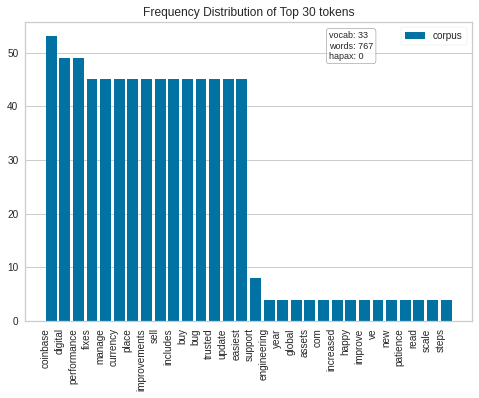

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(coinbase_comments)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', n=30)
visualizer.fit(docs)
visualizer.show()

In [ ]:
unique_coinbase_comments = list(set(coinbase_comments))
len(unique_coinbase_comments)
for i in range(2):
    print(unique_coinbase_comments[i])

Coinbase is the easiest and most trusted place to buy, sell, and manage your digital currency. This update includes bug fixes and performance improvements.
Happy New Year! We appreciate your patience as we scale Coinbase to support the increased global interest in digital assets you can read more about steps we’ve taken to improve performance at engineering.coinbase.com. Thanks for your support!


In [ ]:
# coinbase_data.to_csv("coinbase_data.csv")

##Scrape Yahoo Finance Data

In [ ]:
def yahooFinanceData(main_url, num_of_sites):
    urls = []
    version_name = []
    version_date = []
    version_comments = []
    all_comments = []
    for i in range(1, num_of_sites+1):
        url = main_url + str(i) + '/'
        urls.append(url)
    for i in range(num_of_sites):
        response = requests.get(urls[i])
        print("Website:", i+1, "Response:", response)
        soup = BeautifulSoup(response.content, 'html.parser')
        version_data = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        data_lst = []
        for i in version_data:
            if(i.a != None):
                data_lst.append(i.a.text)
                version_name.append(i.a.text)
        a = soup.find('ol', attrs = {'class': 'history'}).find_all("li")
        a = np.array(a)
        z = [str(i) for i in a]
        dates = []
        for i in z:
            x = i[i.find('(')+1:i.find(')')]
            if(x[0] == 'U'):
                dates.append(x)
                version_date.append(x)
        LL = []
        com = soup.find_all('ul', attrs = {'class': 'changes'})
        for j in com:
            L = []
            text = list(j.descendants)
            for i in range(2, len(text), 3):
                L.append(text[i])
                all_comments.append(text[i])
            LL.append(L)
            version_comments.append(L)
        val = len(data_lst)-len(LL)
        for i in range(val):
            version_comments.append("-")
    print(len(version_name))
    print(len(version_date))
    print(len(version_comments))
    df = pd.DataFrame({'version_name': version_name, 'version_date': version_date, 'version_bugs_fixes': version_comments})
    return df, all_comments

In [ ]:
yahooFinance_data, yahooFinance_comments = yahooFinanceData("https://www.ipa4fun.com/history/1327/", 10)

Website: 1 Response: <Response [200]>
Website: 2 Response: <Response [200]>
Website: 3 Response: <Response [200]>
Website: 4 Response: <Response [200]>
Website: 5 Response: <Response [200]>
Website: 6 Response: <Response [200]>
Website: 7 Response: <Response [200]>
Website: 8 Response: <Response [200]>
Website: 9 Response: <Response [200]>
Website: 10 Response: <Response [200]>
203
203
203


In [ ]:
yahooFinance_data.shape

(203, 3)

In [ ]:
print("- Before removing the duplicates from df:",yahooFinance_data.shape)

# Removing the list brackets from bug fixes statements.
yahooFinance_data['version_bugs_fixes'] = yahooFinance_data['version_bugs_fixes'].str[0]

# Removing the duplicates from the dataframe.
yahooFinance_data = yahooFinance_data.drop_duplicates()

# Updating the date format.
def updateDate(x):
	return x.replace("Updated: ","")
yahooFinance_data['version_date'] = yahooFinance_data['version_date'].apply(updateDate)

print("- After removing the duplicates from df:",yahooFinance_data.shape)

# Blank Line
print("")
yahooFinance_data

- Before removing the duplicates from df: (203, 3)
- After removing the duplicates from df: (194, 3)



,version_name,version_date,version_bugs_fixes
0,Yahoo Finance 9.8.0,"April 21, 2022",Small Widget Update: Now our users can select ...
1,Yahoo Finance 9.7.0,"April 12, 2022",- iPad Sidebar Update: We heard your feedback ...
2,Yahoo Finance 9.6.0,"April 4, 2022",Never miss out when any of your favorite stock...
3,Yahoo Finance 9.5.3,"March 17, 2022","Widgets update: The wait is over, now you will..."
4,Yahoo Finance 9.5.2,"March 10, 2022","Widgets update: The wait is over, now you will..."
...,...,...,...
198,Yahoo Finance 2.2.5,"November 7, 2014",-
199,Yahoo Finance 2.2.4,"September 23, 2014",-
200,Yahoo Finance 2.2.3,"September 16, 2014",-
201,Yahoo Finance 2.2.2,"September 15, 2014",-


In [ ]:
yahooFinance_comments = yahooFinance_data['version_bugs_fixes'].tolist()
print("Before removing the '-' element from the list:",len(yahooFinance_comments))

Before removing the '-' element from the list: 194


In [ ]:
# Removing the random words from the dataset/dataframe.
L = ['Apple', 'IOS', 'iOS', 'apple', 'IOS', 'Iphone', 'iphone', '-']
for i in yahooFinance_comments:
    if(any(email_service in i for email_service in L)):
        yahooFinance_comments.remove(i)
print("After removing the '-' element from the list:",len(yahooFinance_comments))

After removing the '-' element from the list: 29


In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(yahooFinance_comments)
vectorizer.get_feature_names_out()

array(['access', 'accessed', 'accessible', 'account', 'acted', 'added',
       'additional', 'adjusted', 'alert', 'alerted', 'alerts', 'app',
       'audio', 'automatically', 'background', 'broker', 'bug', 'calls',
       'check', 'classic', 'companies', 'control', 'cryptocurrencies',
       'custom', 'daily', 'dark', 'data', 'day', 'did', 'disable',
       'discover', 'distinguish', 'earnings', 'easily', 'enable', 'etfs',
       'experience', 'favorite', 'feature', 'feedback', 'feel', 'finance',
       'fixed', 'fixes', 'follow', 'free', 'funds', 'gain', 'got',
       'header', 'home', 'icon', 'ideas', 'improved', 'improvements',
       'info', 'investment', 'issue', 'just', 'key', 'know', 'link',
       'list', 'lists', 'make', 'market', 'menu', 'miss', 'missing',
       'moved', 'movement', 'mutual', 'new', 'notification',
       'notifications', 'overflow', 'page', 'performance',
       'personalization', 'personalize', 'pick', 'place', 'point',
       'points', 'portfolio', 'premi

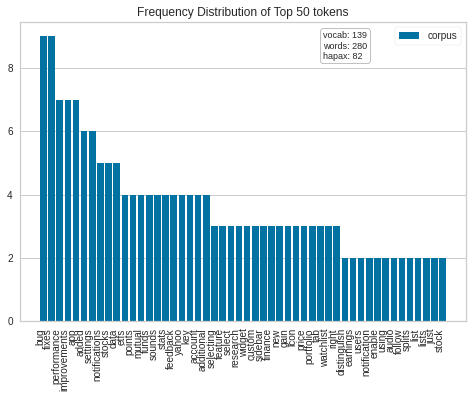

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(yahooFinance_comments)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

In [ ]:
unique_yahooFinance_comments = list(set(yahooFinance_comments))
len(unique_yahooFinance_comments)
for i in range(10):
    print(unique_yahooFinance_comments[i])

Never miss out when any of your favorite stocks splits. Now you will receive a notification on the day a stock in your portfolio or watchlist splits. If you have a price alert for a stock that has split, the target price will be automatically adjusted.
Small Widget Update: Now our users can select to see either Daily Gain or Total Gain by simply tapping Gain (Small Widget) section.
We've added alerts about upcoming earnings for stocks you follow! Make sure to enable push notifications and follow companies with upcoming earnings calls to get alerted.
Thanks for using Yahoo Finance! If you experience an issue while using the app or have feedback to share, feel free to do so by selecting "Send Feedback" in the sidebar.
Additional data points for mutual funds and ETFs added under key stats.
Improved portfolio updates in the Today Widget and fixed an issue where sparklines in the market summary header were sometimes missing the most recent data point.
Performance improvements.
We moved your

In [ ]:
# yahooFinance_data.to_csv("yahooFinance_data.csv")